# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Credit Card Fraud Detection</p>

<p style="text-align:center; ">
<img src="https://www.eastwestbank.com/content/dam/ewb-dotcom/reachfurther/newsarticlestore/519/Credit-card-fraud-top.jpg" style='width: 650px; height: 350px;'>
</p>

# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Датасет и его структура</p>


**Название и путь датасета: ```./data/creditcard.csv```.**

Название признаков анонимизированны.


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Структура проекта (потенциальная)</p>

|No  | Contents                                                         |No  | Contents                                                      |
|:---|:-----------------------------------------------------------------|:---|:--------------------------------------------------------------|
|1   | [<font color="#682F2F"> Импорт необходимых библиотек</font>](#1) |7   | [<font color="#682F2F"> Углубленный EDA</font>](#7)           |
|2   | [<font color="#682F2F"> Информация о датасете</font>](#2)        |8   | [<font color="#682F2F"> Anomaly Detection</font>](#8)         |
|3   | [<font color="#682F2F"> Базовый EDA</font>](#3)                  |9  | [<font color="#682F2F"> Dimensionality Reduction?</font>](#9) |
|4   | [<font color="#682F2F"> Саммари по датасету</font>](#4)          |10  | [<font color="#682F2F"> Classification </font>](#10)          |
|5   | [<font color="#682F2F"> Data Preprocessing</font>](#5)           |11  | [<font color="#682F2F"> Testing </font>](#11)                 |
|6   | [<font color="#682F2F"> Визуальный анализ и выводы</font>](#6)   |12  | [<font color="#682F2F"> Summary</font>](#12)                  |

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Импорт библиотек для проекта</p>

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

# HINT!
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbalancedPipeline

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression	
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.manifold import TSNE
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit

from utils import show_data_missings
from utils import read_data
from utils import print_basic_statistics
from utils import corr_feature_detect
from utils import plot_corr_matrix
from utils import ndarray_to_dataframe
from utils import outlier_detect_IQR
from utils import print_outlier_detect_summary
from utils import plot_explained_variance_ratio
from utils import plot_cumulative_explained_variance_ratio
from utils import plot_features_distributions
from utils import render_plots_table
from utils import build_confusion_matrix
from utils import plot_conf_matrix_table
from utils import plot_roc_curves
from utils import print_basic_quality_metrics

from utils import basic_model_test
from utils import get_basic_quality_metrics
from utils import plot_roc_curve
from utils import plot_confusion_matrix
from utils import print_metrics_table

In [3]:
import importlib
imported_module = importlib.import_module('utils')
importlib.reload(imported_module);

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
random_state = 42


<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Базовый EDA и знакомство с датасетом</p>

In [6]:
data = read_data('./data/creditcard.csv')

print_basic_statistics(data, 'Class')

Shape = (284807, 31)

Columns = ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']

First 15 samples:
    Time        V1        V2        V3        V4        V5        V6        V7        V8        V9  ...       V21       V22       V23       V24       V25       V26       V27       V28  Amount  Class
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -

Классы несбалансированы!

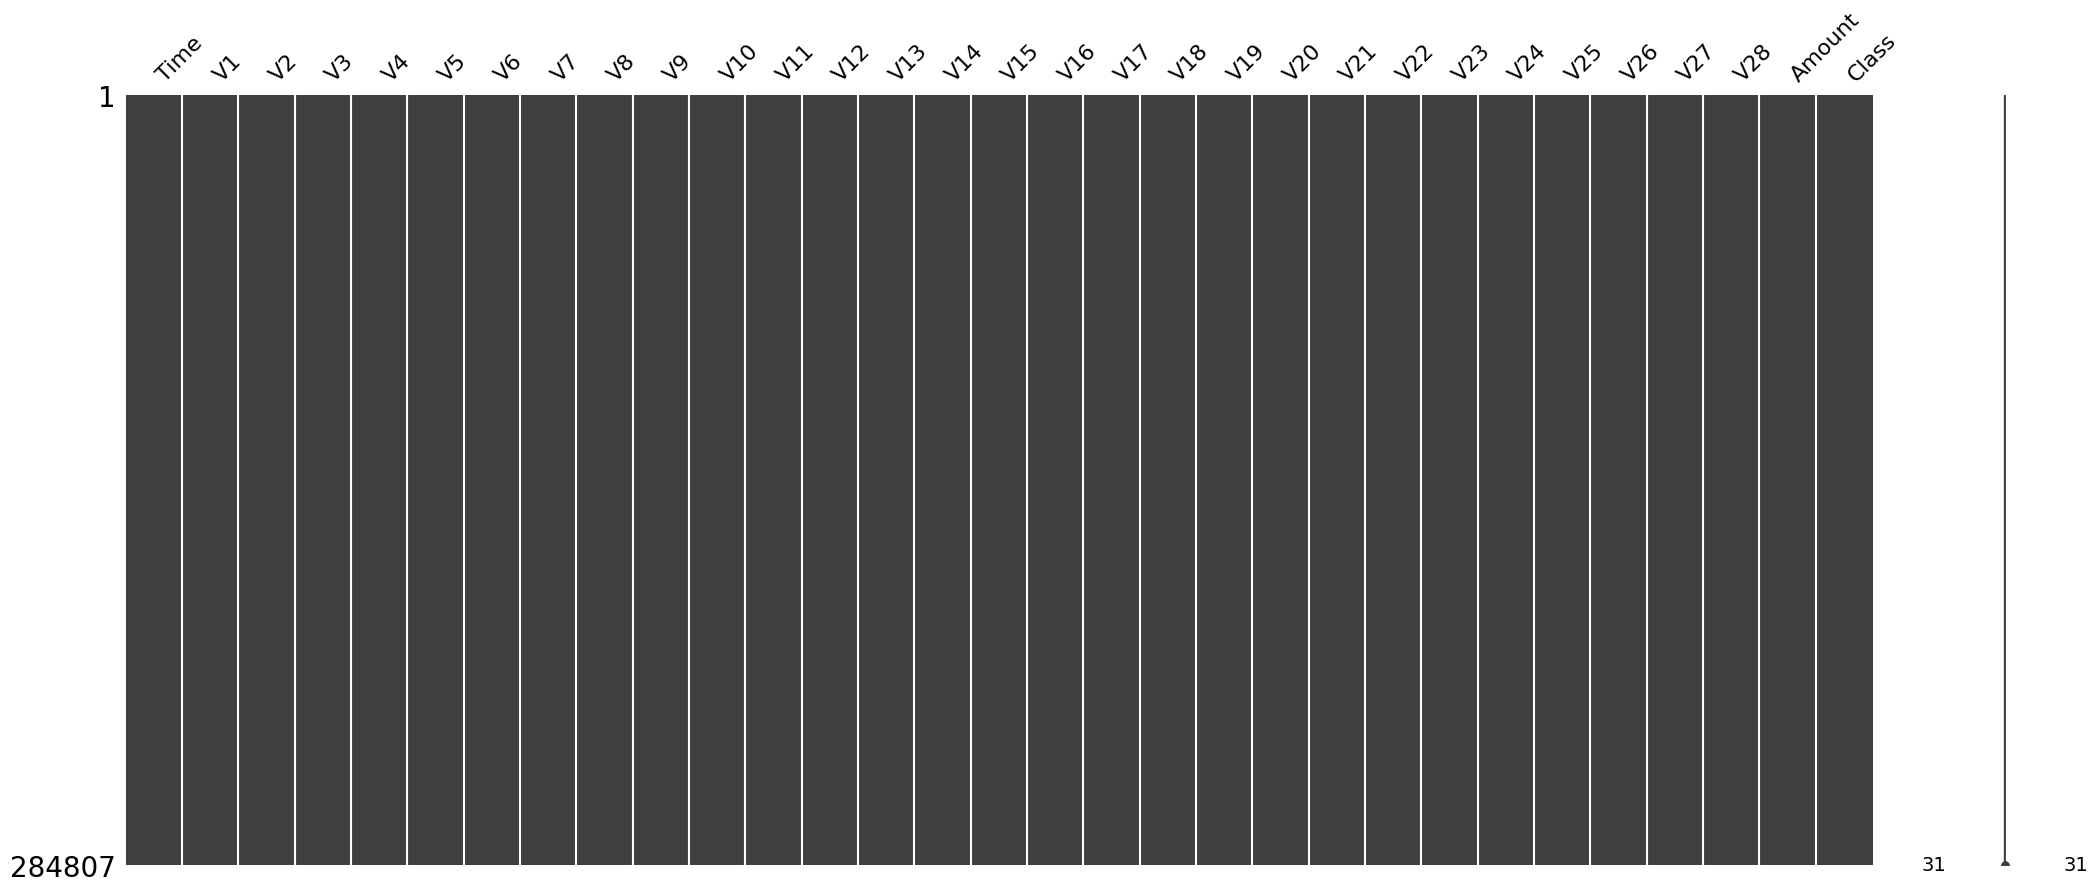

<Figure size 1500x900 with 0 Axes>

In [7]:
show_data_missings(data)

Пропусков в данных нет.

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

Делим данные на тренировочный и тестовый наборы.

In [8]:
X = data.drop('Class', axis=1)

In [9]:
y = data.Class

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=random_state)

In [11]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Т.к. наблюдений много и они несбалансированы было решено применить андерсэмплинг.<br>
Что должно как ускорить скорость обучения, т.к. больший класс будет сужен до количества наблюдений в меньшем, чтобы пропорция их в датасете была одинаковой.<br>
Так же это поможет моделям точнее обучаться в силу одинаковой представленности обоих классов после андерсэмплинга.

In [12]:
rm = RandomUnderSampler(random_state=random_state)

In [13]:
X_train_resampled, y_train_resampled = rm.fit_resample(X_train, y_train)

In [14]:
random_indices = np.random.permutation(len(X_train_resampled))

X_train_resampled = X_train_resampled.iloc[random_indices]
y_train_resampled = y_train_resampled.iloc[random_indices]

X_train_resampled.reset_index(drop=True, inplace=True)
y_train_resampled.reset_index(drop=True, inplace=True)

In [15]:
data_resampled = pd.concat([X_train_resampled, y_train_resampled], axis=1)

In [16]:
y_train_resampled.value_counts()

Class
0    418
1    418
Name: count, dtype: int64

Видим, что оба класса представлены одинаковым количеством наблюдений.

Ищем коллинеарные признаки:

In [17]:
corr = corr_feature_detect(data=data_resampled, threshold=0.9)

print('Top correlations:\n')
for i in corr:
    print(i, '\n')

Top correlations:

  feature1 feature2      corr
0      V17      V16  0.946750
2      V17      V18  0.943913 

  feature1 feature2      corr
1      V16      V17  0.946750
5      V16      V18  0.904608 

  feature1 feature2      corr
3      V18      V17  0.943913
4      V18      V16  0.904608 



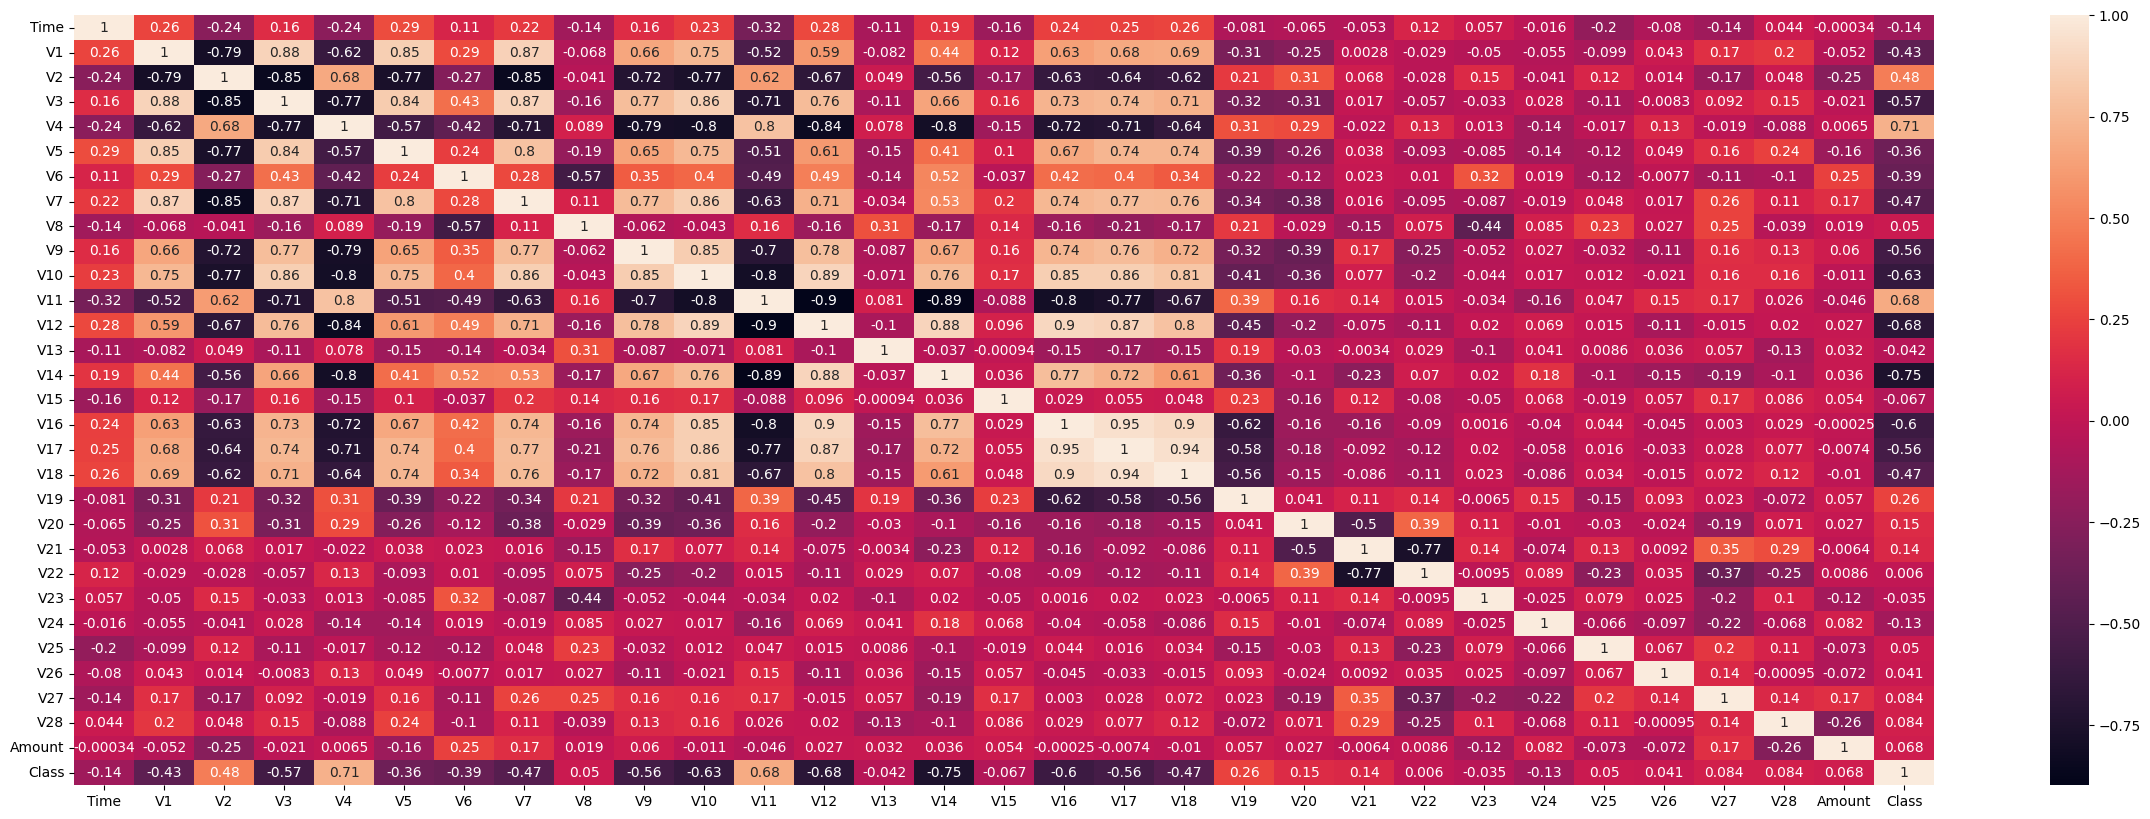

In [18]:
plot_corr_matrix(data_resampled, figsize=(30, 10))

Видим, что признаки V16, V17, V18 сильно между собой коррелируют. Оставляем только признак V16.

In [19]:
data_preprocessed = data.drop(['V17', 'V18'], axis=1)

data_resampled_preprocessed = data_resampled.drop(['V17', 'V18'], axis=1)

X_train_resampled_preprocessed = X_train_resampled.drop(['V17', 'V18'], axis=1)

X_train_preprocessed = X_train.drop(['V17', 'V18'], axis=1)

X_test_preprocessed = X_test.drop(['V17', 'V18'], axis=1)

In [20]:
X_train_preprocessed

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,152194.0,2.082004,-0.818569,-1.135807,-0.173036,-0.703332,-0.669019,-0.458621,-0.101388,-0.103272,...,-0.735559,-0.150079,0.286583,0.051542,0.000384,0.179212,-0.070597,0.009024,-0.067930,11.50
1,163116.0,1.961180,-0.132630,-1.204767,0.517382,-0.064926,-1.186268,0.369890,-0.391319,0.697708,...,-0.131920,-0.182646,-0.393861,0.192813,0.045326,-0.008818,-0.514709,-0.017378,-0.043669,48.62
2,159924.0,-1.748416,1.099935,-0.456043,-0.500196,1.140714,0.133756,0.715703,-0.180735,-0.109877,...,-0.407679,0.291384,0.965511,-0.323269,-1.387123,0.421327,0.041559,-1.224216,-0.040818,2.99
3,61817.0,0.794243,-1.688863,1.341493,-0.115494,-2.018830,0.272800,-1.087525,0.160009,0.016777,...,0.613987,0.315605,0.672284,-0.272175,0.636383,0.338395,-0.178151,0.032779,0.063393,250.00
4,76825.0,-0.416285,0.588658,1.185738,-2.091479,0.033349,-1.322596,1.001690,-0.247473,0.724273,...,-0.034979,0.113082,0.615876,-0.270214,0.511572,-0.020916,-0.865917,0.228222,-0.024121,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242080,147710.0,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,...,-0.174051,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99
242081,60764.0,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,...,-0.225079,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99
242082,35301.0,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,...,-0.149402,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42
242083,24413.0,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,...,-0.093783,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89


In [21]:
X_test_preprocessed.shape

(42722, 28)

Проводим повторную проверку:

In [22]:
corr = corr_feature_detect(data=data_resampled_preprocessed, threshold=0.9)

print('Top correlations:\n')
for i in corr:
    if (i['feature1'] == 'Class' or i['feature2'] == 'Class'):
        print(i, '\n')

Top correlations:



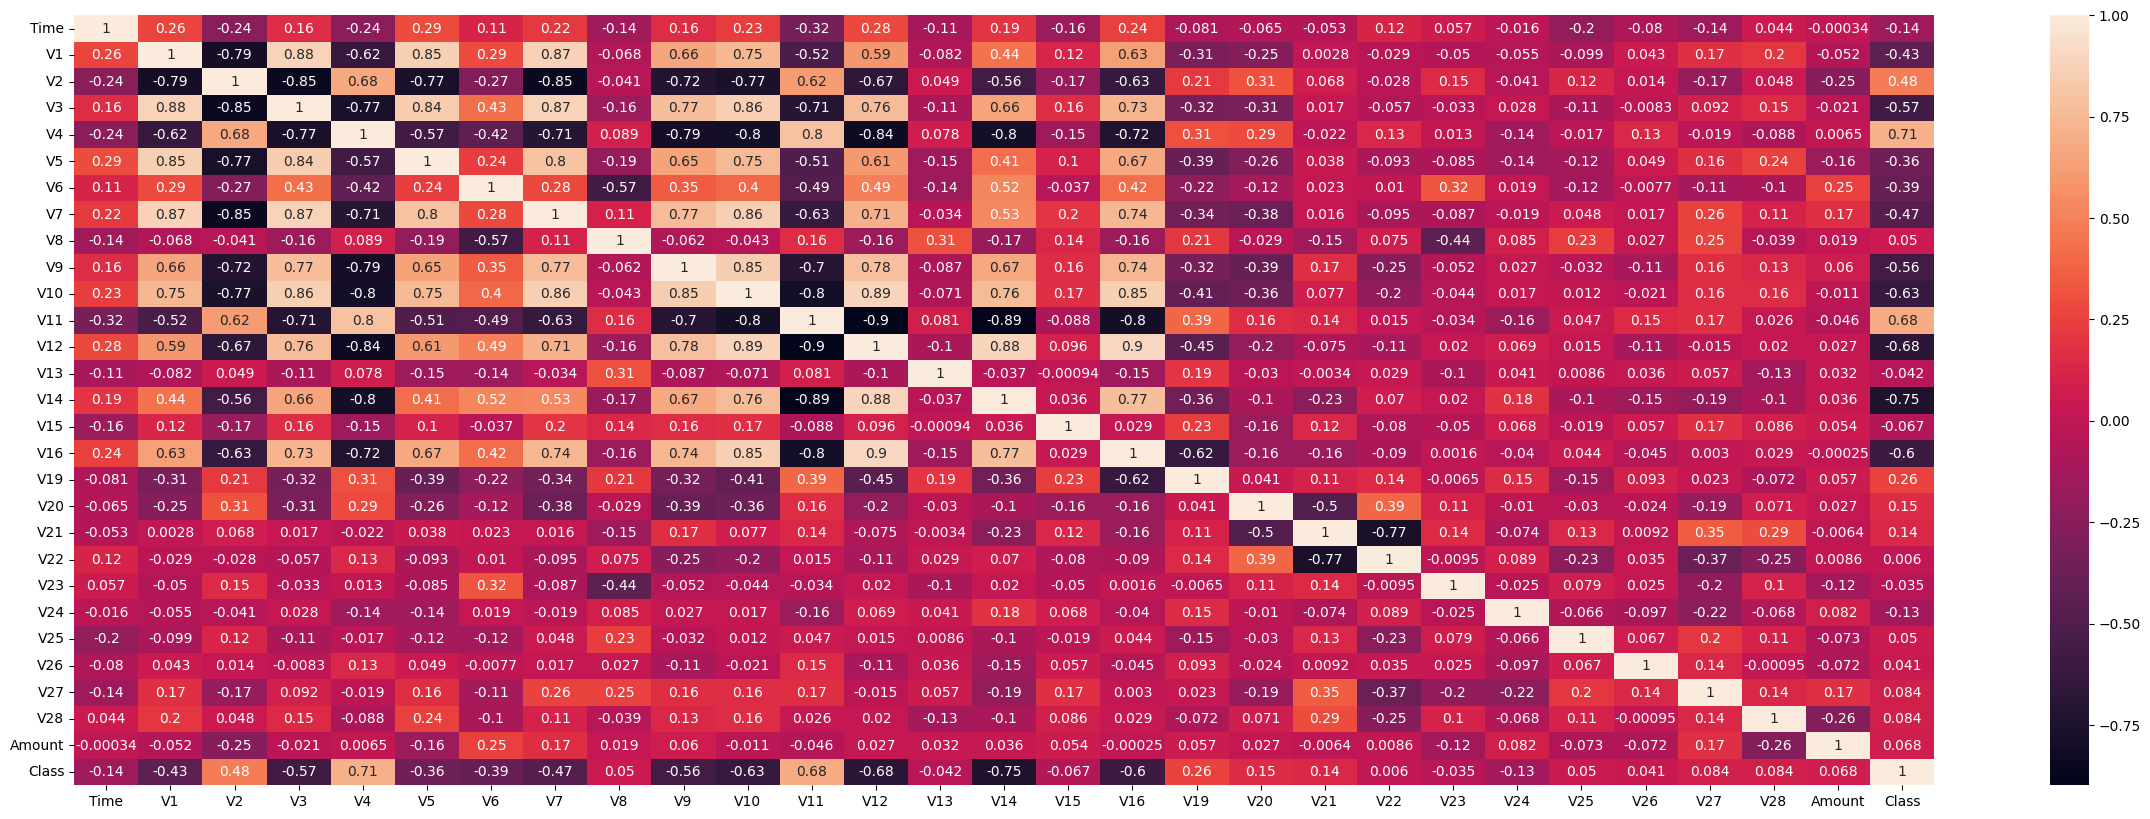

In [23]:
plot_corr_matrix(data_resampled_preprocessed, figsize=(30, 10))

Корреляций выше порога 0.9 не осталось.

Посмотрим на распределение данных по каждому признаку:

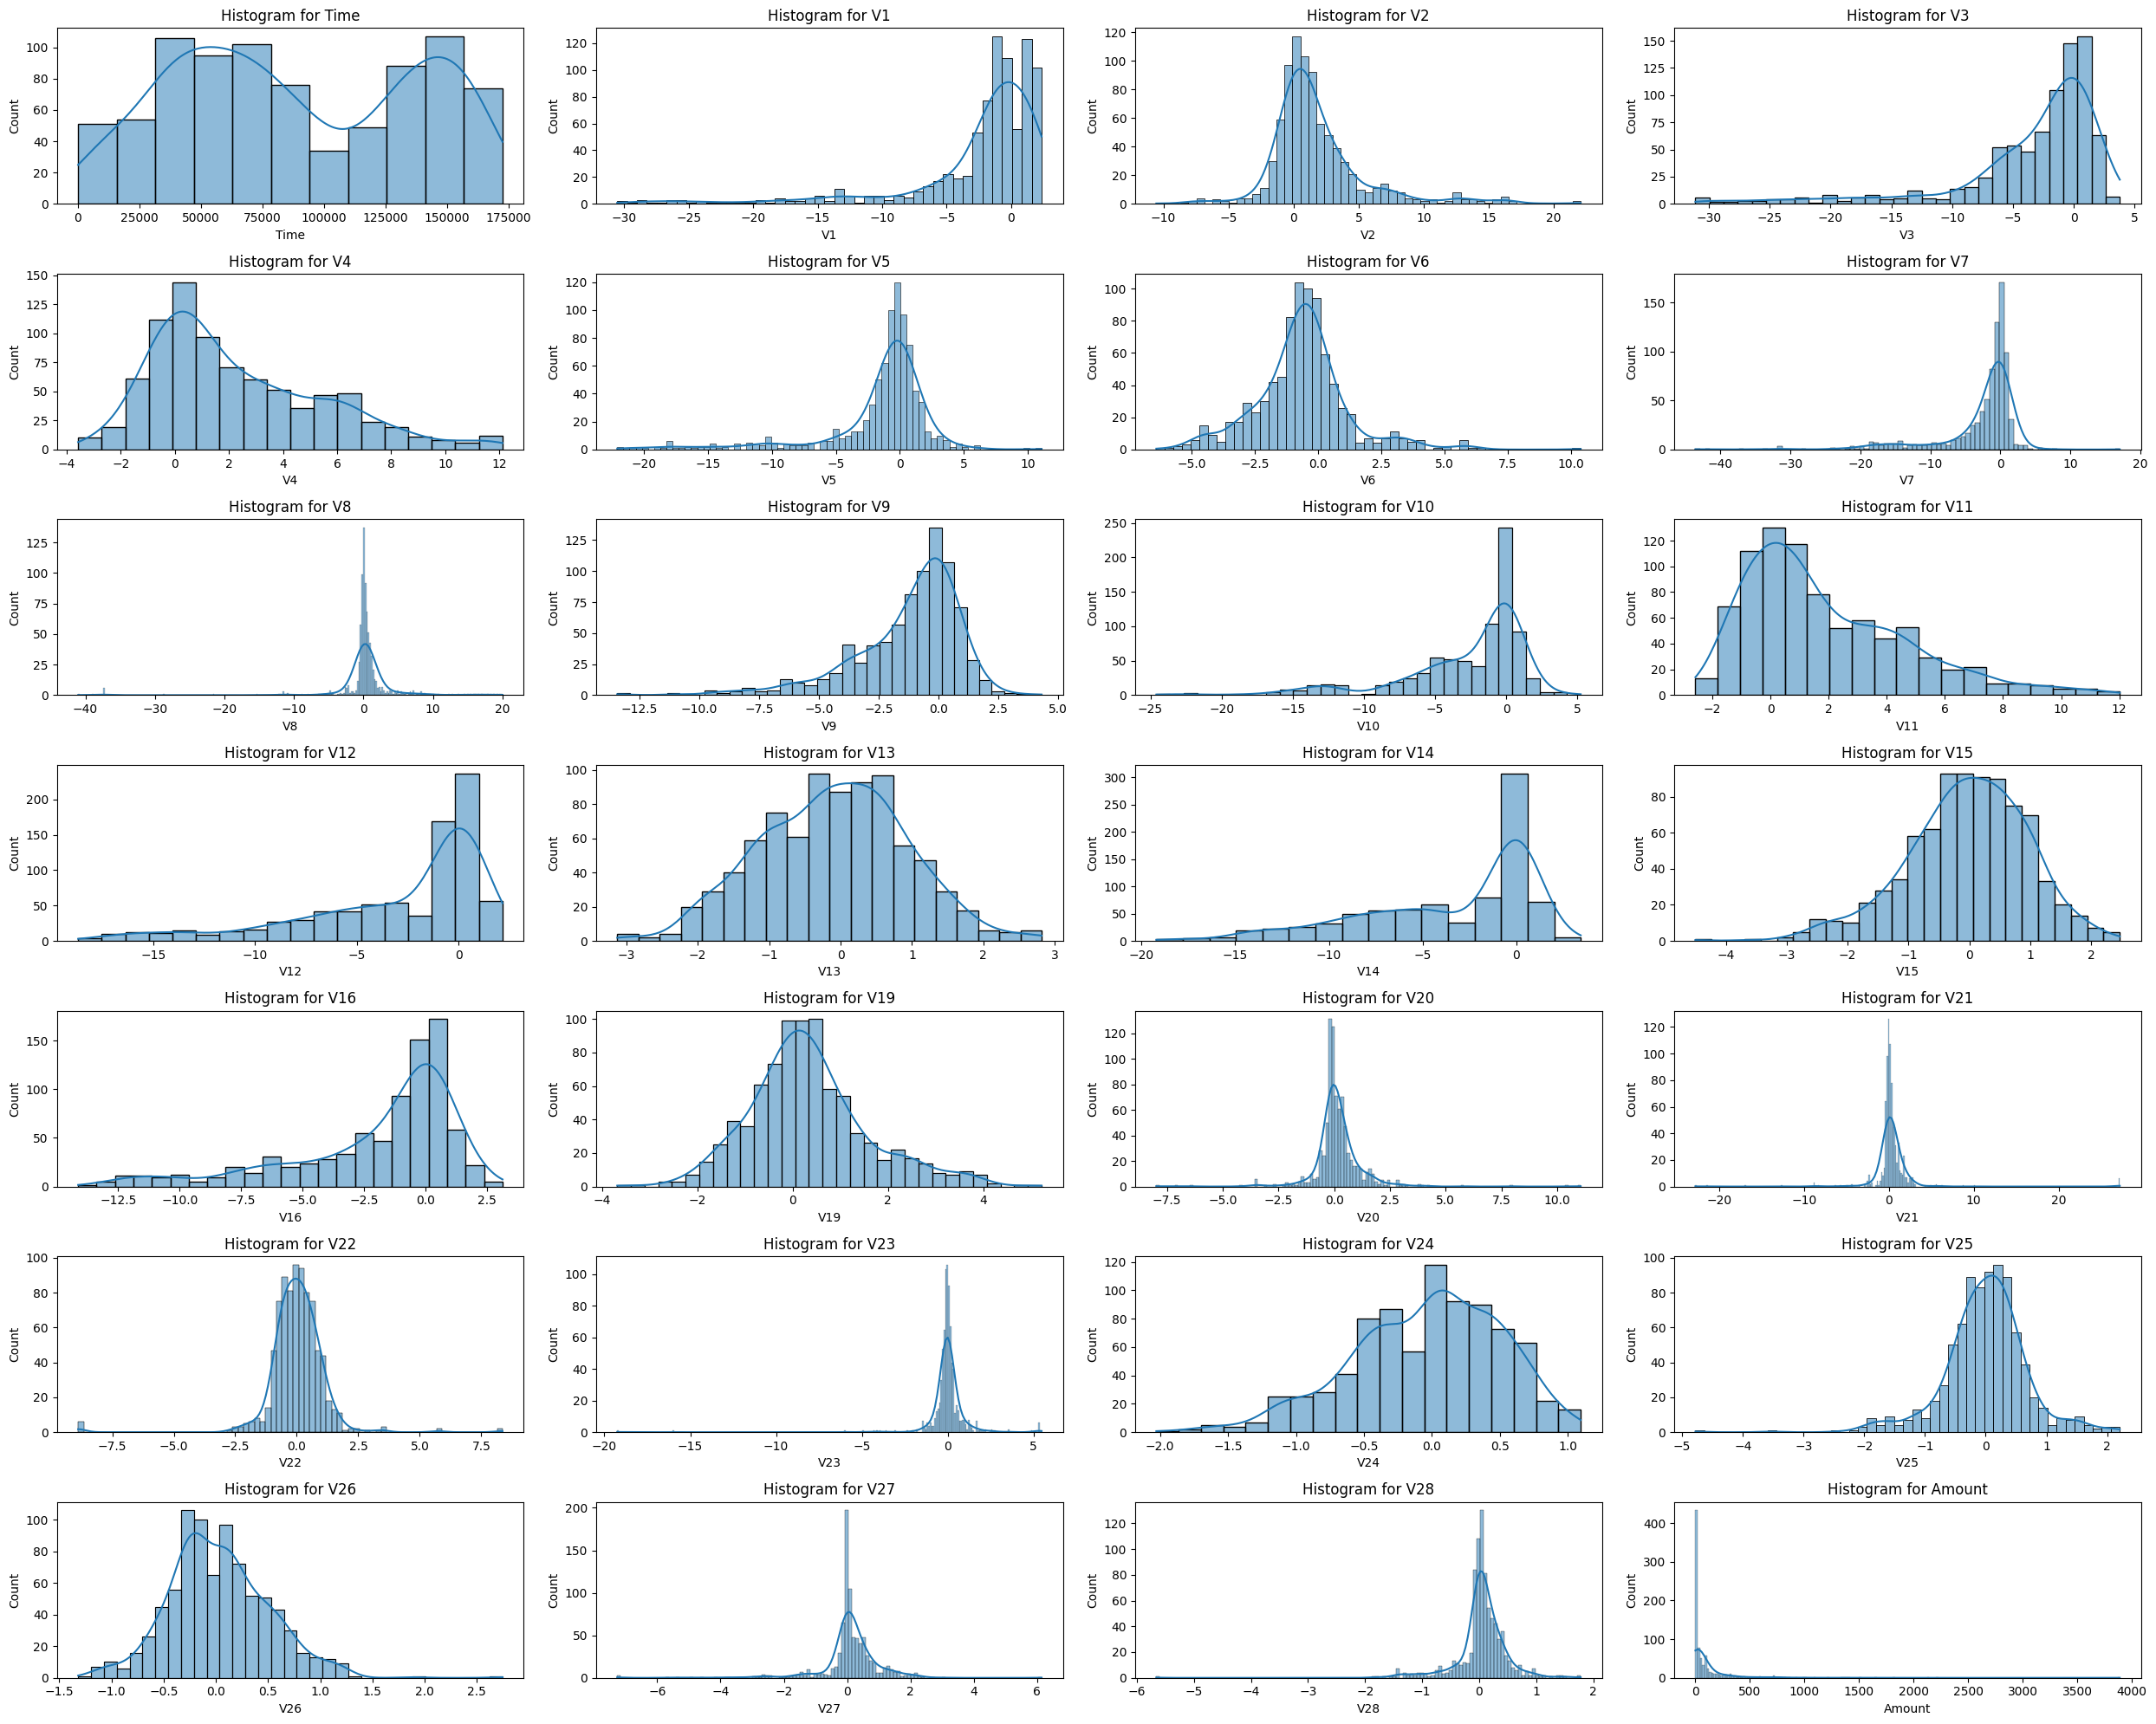

In [24]:
plot_features_distributions(data_resampled_preprocessed, data_resampled_preprocessed.drop('Class', axis=1).columns, 4)

Видим ярко выраженное бимодальное распределение по признаку 'Time'.<br>
Применим для него логарифмическое преобразование.

Перед этим избавляемся от 0-го значения 'Time'

In [25]:
data_preprocessed[data_preprocessed['Time'] == 0] = 1

data_resampled_preprocessed[data_resampled_preprocessed['Time'] == 0] = 1

X_train_resampled_preprocessed[X_train_resampled_preprocessed['Time'] == 0] = 1

X_train_preprocessed[X_train_preprocessed['Time'] == 0] = 1

X_test_preprocessed[X_test_preprocessed['Time'] == 0] = 1

Применяем лог преобразование

In [26]:
data_preprocessed['Time'] = np.log10(data_preprocessed['Time'])

data_resampled_preprocessed['Time'] = np.log10(data_resampled_preprocessed['Time'])

X_train_resampled_preprocessed['Time'] = np.log10(X_train_resampled_preprocessed['Time'])

X_train_preprocessed['Time'] = np.log10(X_train_preprocessed['Time'])

X_test_preprocessed['Time'] = np.log10(X_test_preprocessed['Time'])

Посмотрим на результат:

<Axes: xlabel='Time', ylabel='Count'>

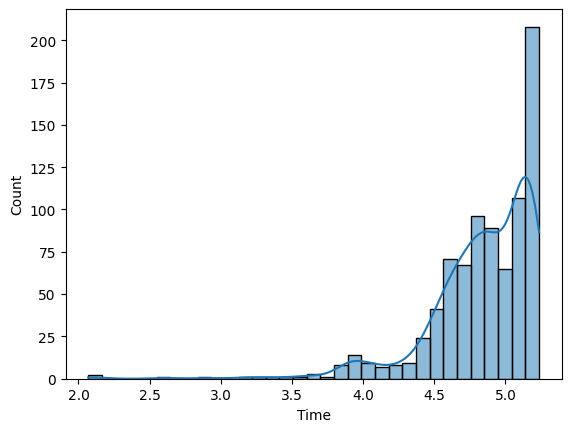

In [27]:
sns.histplot(data=data_resampled_preprocessed, x='Time', kde=True)

От бимодальности мы избавились.

Масштабируем данные, что важно более эффективной работы моделей на основе расстояния.

In [28]:
rb = RobustScaler()

In [29]:
cols = X_train_resampled_preprocessed.columns

In [30]:
X_train_resampled_preprocessed = rb.fit_transform(X_train_resampled_preprocessed)
X_test_preprocessed = rb.transform(X_test_preprocessed)

In [31]:
data_resampled_preprocessed = pd.concat([ndarray_to_dataframe(X_train_resampled_preprocessed, columns=cols), ndarray_to_dataframe(y_train_resampled)], axis=1)

In [32]:
data_resampled_preprocessed

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
ID,,,,,,,,,,,,,,,,,,,,,
0,0.407030,0.789876,-0.744119,0.035795,-0.480652,-0.242383,-0.265358,0.040008,-0.408515,0.273987,...,0.196961,0.599237,0.160541,-0.129978,-0.161161,-0.152213,-0.176690,-0.310345,0.790865,0
1,0.516824,0.148886,-0.124164,0.339888,-0.277641,0.177065,-0.330319,0.461670,-0.428718,0.231324,...,-0.415724,-0.648621,0.246447,0.421933,-0.773968,0.523093,-0.627326,0.057305,0.241370,0
2,-0.979714,-0.525451,-0.370071,-0.036372,0.463347,-1.282744,0.723414,0.298991,0.730998,-0.626404,...,0.964222,-0.247623,4.213076,0.248152,0.162266,-0.437328,0.326702,0.742398,7.243275,1
3,-0.005093,-0.289405,-0.333225,0.575416,0.332355,0.353995,0.818512,0.006117,0.222555,0.158077,...,-0.209153,0.164682,-1.509905,-0.485022,-1.032815,0.041769,-0.546909,-1.442949,0.140067,0
4,0.588359,0.301335,0.000195,0.179494,-0.433492,0.673702,-0.039104,0.525274,-0.375722,0.134123,...,-0.518694,-0.670500,0.223478,0.648827,-0.727027,0.180879,-0.107049,-0.034582,-0.155511,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,-0.046879,0.547102,0.094971,-0.023255,0.161740,0.607460,-0.211308,0.325831,-0.277273,0.263846,...,-0.636378,-0.688446,-0.294079,-0.419613,0.933982,-0.515478,0.105504,0.288692,-0.172683,1
832,-0.612761,-5.472047,3.013810,-3.378093,1.109795,-6.465158,-0.997113,-6.307644,0.906950,-3.238674,...,-2.699745,0.598823,-1.187521,0.657351,-0.137365,0.196857,-7.377416,-3.854029,-0.172683,1
833,0.621031,0.849150,-0.512482,-0.167467,-0.548214,0.303896,-0.414164,0.289500,-0.714092,-0.154065,...,0.294891,0.939007,-0.080935,0.926404,0.614481,0.089491,-0.255184,-0.389998,0.120964,0


<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Углубленный EDA</p>

Выделим признаки, которые более всего коррелируют с положительным классом. Порог установлен в 0.7

In [33]:
corr = corr_feature_detect(data=data_resampled_preprocessed, threshold=0.7)
columns_to_process = []

print('Top correlations with \'Class\':\n')
for i in corr:
    if (i['feature1'].unique()[0] == 'Class'):
        columns_to_process = i['feature2'].values
        print(i, '\n')

Top correlations with 'Class':

   feature1 feature2      corr
50    Class       V4  0.713931
62    Class      V14 -0.745330 



In [34]:
columns_to_process

array(['V4', 'V14'], dtype=object)

Признаки 'V4', 'V14' коррелируют с положительным классом сильнее остальных.<br>
Уберём выбросы для этих признаков, т.к. они влияют сильнее остальных и выбросы в них могут соответственно сильнее повлиять на способность модели к распознаванию положительного класса в итоге.

In [35]:
outlier_index_global = pd.Series(False, index=range(y_train_resampled.size))

for index, value in enumerate(columns_to_process):
    print(f'Column-{value}')
    outlier_index, param = outlier_detect_IQR(data_resampled_preprocessed, value, 1.5)
    print_outlier_detect_summary(outlier_index)
    outlier_index_global |= outlier_index

Column-V4
Number of outliers:  15
Outlier share:  0.017942583732057416
Column-V14
Number of outliers:  7
Outlier share:  0.008373205741626795


In [36]:
outlier_index_global.sum()

22

In [37]:
data_resampled_preprocessed_no_outliers = data_resampled_preprocessed[~outlier_index_global]

In [38]:
data_resampled_preprocessed.shape

(836, 29)

In [39]:
data_resampled_preprocessed_no_outliers.shape

(814, 29)

In [40]:
X_train_resampled_preprocessed_no_outliers = data_resampled_preprocessed_no_outliers.drop('Class', axis=1)
y_train_resampled_no_outliers = data_resampled_preprocessed_no_outliers['Class']

In [41]:
X_train_resampled_preprocessed_no_outliers.reset_index(drop=True, inplace=True)
y_train_resampled_no_outliers.reset_index(drop=True, inplace=True)

Таким образом, было убрано 22 выбросы.

Попробуем предварительно оценить разделяемость классов, исользуя t-SNE:

In [42]:
tsne = TSNE(n_components=2, perplexity=30, random_state=random_state, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X_train_resampled_preprocessed_no_outliers)

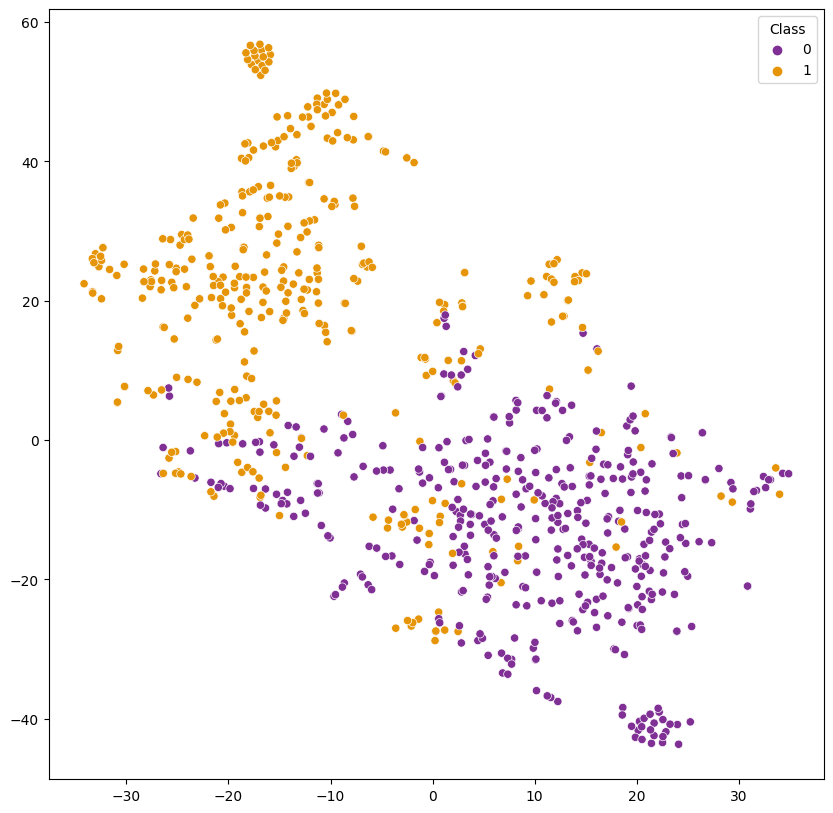

In [43]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_transformed[:, 0], 
    y=tsne_transformed[:, 1], 
    hue=y_train_resampled_no_outliers.astype(int),
    palette="CMRmap",
    legend='full'
);

По данному графику можно предположить, что классы с определённой степеню ошибки можно даже попробовать линейно разделить.<br>
Т.е. предположительно даже линейная логистическая регрессия с этой задачей сможет справиться.<br>
В дальнейшем мы это проверим.

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Anomaly Detection EDA</p>

!HINT
Обратите внимание на несбаланисированность классов. Попробуйте те методики баланса классов, которые мы с вами прошли (например SMOTE).


### SMOTE Technique (Over-Sampling):
<a id="smote"></a>

<b>SMOTE</b> stands for Synthetic Minority Over-sampling Technique.  Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". <br><br>


<b> Understanding SMOTE: </b>
<ul>
<li> <b> Solving the Class Imbalance: </b> SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. </li>
<li><b>Location of the synthetic points: </b>   SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. </li>
<li> <b>Final Effect:  </b> More information is retained since we didn't have to delete any rows unlike in random undersampling.</li>
<li><b> Accuracy || Time Tradeoff: </b> Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.</li>

</ul>

### Cross Validation Overfitting Mistake:
## Overfitting during Cross Validation:
If you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. <b>In the following section you will see amazing precision and recall scores but in reality our data is overfitting!</b>
### The Wrong Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401"><br>

As mentioned previously, if we get the minority class ("Fraud") in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below: <br>


### The Right Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372"> <br>
As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

Попробуем применить SMOTE для решения проблемы дисбаланса классов:

In [44]:
sm = SMOTE()

In [45]:
X_train_smote_resampled, y_train_smote_resampled = sm.fit_resample(X_train, y_train)

In [46]:
random_smote_indices = np.random.permutation(len(X_train_smote_resampled))

X_train_smote_resampled = X_train_smote_resampled.iloc[random_smote_indices]
y_train_smote_resampled = y_train_smote_resampled.iloc[random_smote_indices]

X_train_smote_resampled.reset_index(drop=True, inplace=True)
y_train_smote_resampled.reset_index(drop=True, inplace=True)

In [47]:
y_train_smote_resampled.value_counts()

Class
0    241667
1    241667
Name: count, dtype: int64

Классы сбалансировали.

Проведём тот же препроцессинг, что и ранее:

In [48]:
X_train_smote_resampled_preprocessed = X_train_smote_resampled.drop(['V17', 'V18'], axis=1)

X_test_smote_preprocessed = X_test.drop(['V17', 'V18'], axis=1)

In [49]:
X_train_smote_resampled_preprocessed[X_train_smote_resampled_preprocessed['Time'] == 0] = 1

X_test_smote_preprocessed[X_test_smote_preprocessed['Time'] == 0] = 1

In [50]:
X_train_smote_resampled_preprocessed['Time'] = np.log10(X_train_smote_resampled_preprocessed['Time'])

X_test_smote_preprocessed['Time'] = np.log10(X_test_smote_preprocessed['Time'])

In [51]:
rb = RobustScaler()

In [52]:
X_train_smote_resampled_preprocessed = rb.fit_transform(X_train_smote_resampled_preprocessed)
X_test_smote_preprocessed = rb.transform(X_test_smote_preprocessed)

In [53]:
data_smote_resampled_preprocessed = pd.concat([ndarray_to_dataframe(X_train_smote_resampled_preprocessed, columns=cols), ndarray_to_dataframe(y_train_smote_resampled)], axis=1)

In [54]:
from utils import outlier_detect_IQR
from utils import print_outlier_detect_summary


outlier_index_global_smote = pd.Series(False, index=range(y_train_smote_resampled.size))

for index, value in enumerate(columns_to_process):
    print(f'Column-{value}')
    outlier_index, param = outlier_detect_IQR(data_smote_resampled_preprocessed, value, 1.5)
    print(len(outlier_index))
    print_outlier_detect_summary(outlier_index)
    outlier_index_global_smote |= outlier_index

Column-V4
483334
Number of outliers:  6009
Outlier share:  0.012432396644970145
Column-V14
483334
Number of outliers:  2252
Outlier share:  0.004659303918201492


In [55]:
data_smote_resampled_preprocessed_no_outliers = data_smote_resampled_preprocessed[~outlier_index_global_smote]

In [56]:
X_train_smote_resampled_preprocessed_no_outliers = data_smote_resampled_preprocessed_no_outliers.drop('Class', axis=1)
y_train_smote_resampled_no_outliers = data_smote_resampled_preprocessed_no_outliers['Class']

In [57]:
X_train_smote_resampled_preprocessed_no_outliers.reset_index(drop=True, inplace=True)
y_train_smote_resampled_no_outliers.reset_index(drop=True, inplace=True)

In [281]:
def iqr_remove_outliers(x, y, threshold):
    columns_to_process = ['V4', 'V14']
    #columns_to_process = X_train_preprocessed.columns
    
    outlier_index_global = pd.Series(False, index=range(x.size))
    
    for _, value in enumerate(columns_to_process):
        outlier_index, param = outlier_detect_IQR(x[y==0], value, threshold)
        outlier_index_global |= outlier_index

    return x[~outlier_index_global].reset_index(drop=True), y[~outlier_index_global].reset_index(drop=True)

In [282]:
X_train_preprocessed_no_outliers, y_train_no_outliers = iqr_remove_outliers(X_train_preprocessed, y_train, 1.5)

In [283]:
y_train_no_outliers.value_counts()

Class
0    221495
1       418
Name: count, dtype: int64

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dimensionality Reduction?</p>

In [58]:
n_components = X_train.shape[1]
kernel = 'rbf'
gamma = None
n_jobs = -1

kernelPCA = KernelPCA(n_components=X_train_resampled_preprocessed_no_outliers.shape[1], kernel=kernel, gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train_resampled_preprocessed_no_outliers)

X_train_resampled_preprocessed_no_outliers_PCA = kernelPCA.transform(X_train_resampled_preprocessed_no_outliers)
X_test_preprocessed_PCA = kernelPCA.transform(X_test_preprocessed)

[0.26057372 0.09770064 0.06148844 0.0476119  0.04099201 0.03698564
 0.03597165 0.03202061 0.03096709 0.02994846 0.02912588 0.02718783
 0.02688041 0.02424068 0.02300165 0.02185956 0.02070856 0.01808841
 0.01739587 0.01711514 0.01528757 0.01451847 0.01313082 0.01252359
 0.01208825 0.01140075 0.01073907 0.0104473 ]


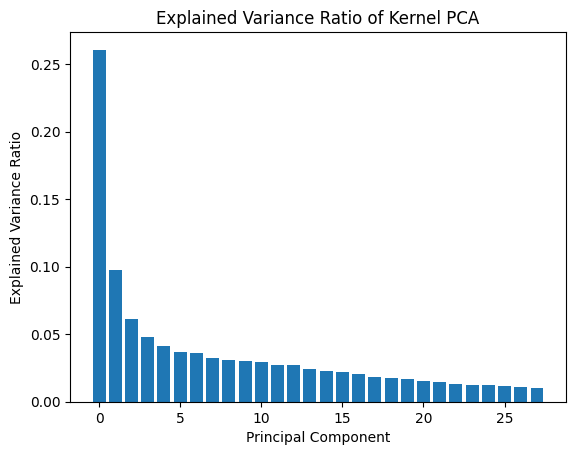

First 24 features explain enough variance for threshold 0.95: 0.9553246205102482


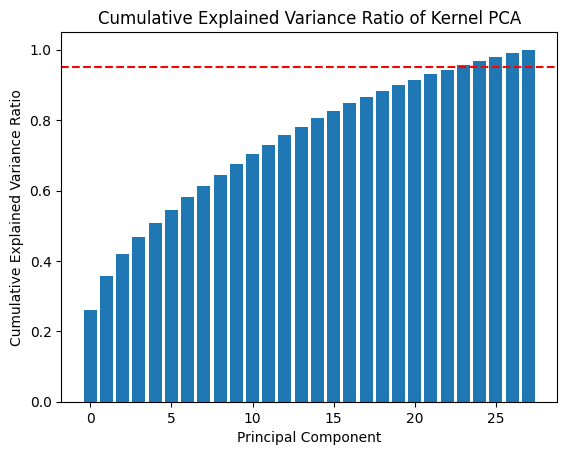

24

In [59]:
# Compute the eigenvalues of the kernel matrix
eigenvalues = kernelPCA.eigenvalues_

# Compute the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

print(explained_variance_ratio)

plot_explained_variance_ratio(explained_variance_ratio, 'Kernel PCA')
plot_cumulative_explained_variance_ratio(explained_variance_ratio, 'Kernel PCA', 0.95)

In [60]:
n_components = X_train.shape[1]
kernel = 'rbf'
gamma = None
n_jobs = -1

kernelPCA = KernelPCA(n_components=24, kernel=kernel, gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train_resampled_preprocessed_no_outliers)

X_train_resampled_preprocessed_no_outliers_PCA = kernelPCA.transform(X_train_resampled_preprocessed_no_outliers)
X_test_preprocessed_PCA = kernelPCA.transform(X_test_preprocessed)

In [61]:
n_components = X_train.shape[1]
kernel = 'rbf'
gamma = None
n_jobs = -1

kernelPCA = KernelPCA(n_components=24, kernel=kernel, gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train_smote_resampled_preprocessed_no_outliers.loc[:1000, :])

X_train_smote_resampled_preprocessed_no_outliers_PCA = kernelPCA.transform(X_train_smote_resampled_preprocessed_no_outliers)
X_test_smote_preprocessed_PCA = kernelPCA.transform(X_test_smote_preprocessed)

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Classification</p>

In [75]:
def test_basic_models(x_train, x_test, y_train, y_test):
    models = [LogisticRegression(n_jobs=-1), DecisionTreeClassifier(), SVC(max_iter=10000, probability=True), KNeighborsClassifier(n_jobs=-1)]

    for basic_model in models:
        basic_model.fit(x_train, y_train)

    print_models_stats(models, x_test, y_test)
    
def print_models_stats(models, x_test, y_test):
    models_names = [basic_model.__class__.__name__ for basic_model in models]

    models_metrics = []
    models_conf_matrices = []
    models_y_pred_proba = []

    for basic_model in models:
        y_pred = basic_model.predict(x_test)
        y_pred_proba = basic_model.predict_proba(x_test)

        models_metrics.append(get_basic_quality_metrics(y_test, y_pred, y_pred_proba))
        models_conf_matrices.append(build_confusion_matrix(y_test, y_pred))
        models_y_pred_proba.append(y_pred_proba)
        
    print_metrics_table(models_metrics, models_names)
    plot_conf_matrix_table(models_conf_matrices, len(models), (20,5), models_names)
    plot_roc_curves(models, x_test, y_test, (8,6))

Базовый просмотр простых моделей.

1. На датасете с андерсэмплингом:

                         ROC AUC  Accuracy  Precision    Recall  F1-score
LogisticRegression      0.958427  0.974088   0.055125  0.864865  0.103644
DecisionTreeClassifier  0.923963  0.915524   0.018786  0.932432  0.036829
SVC                     0.965208  0.970460   0.047945  0.851351  0.090778
KNeighborsClassifier    0.951975  0.957844   0.033999  0.851351  0.065387


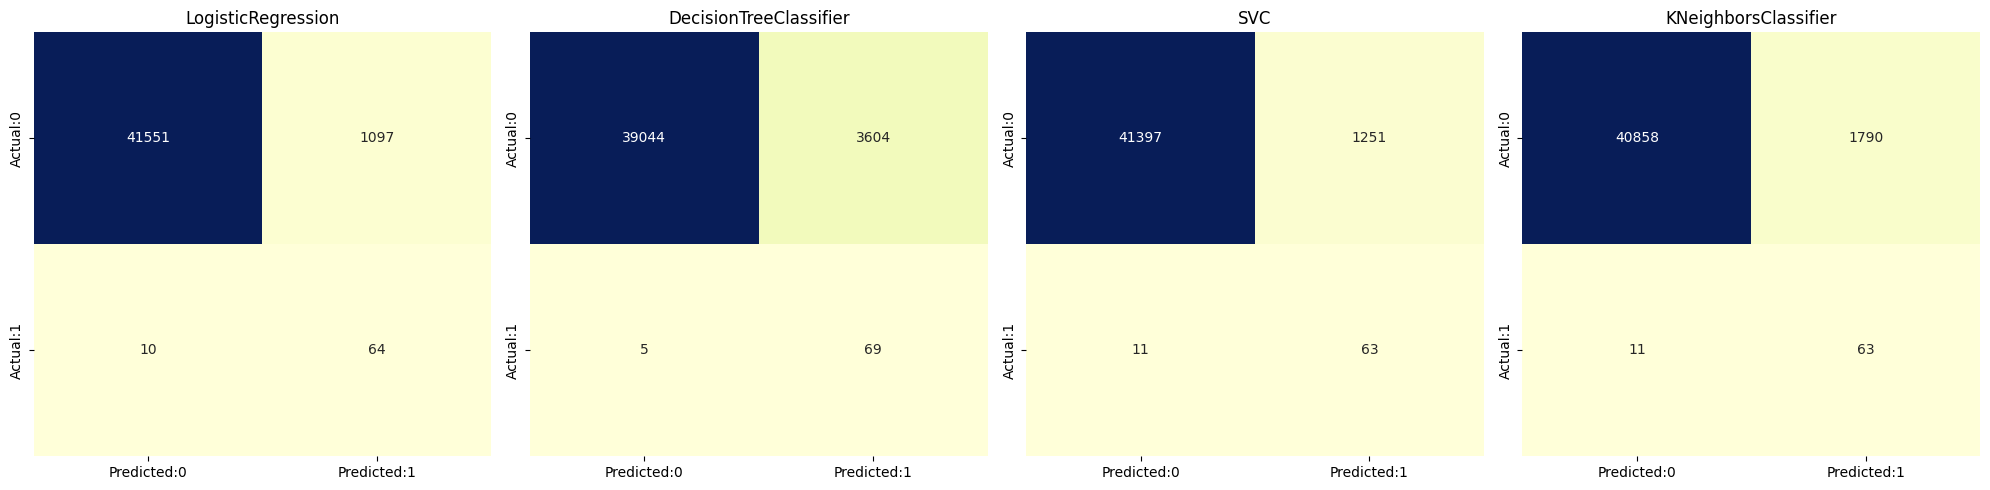

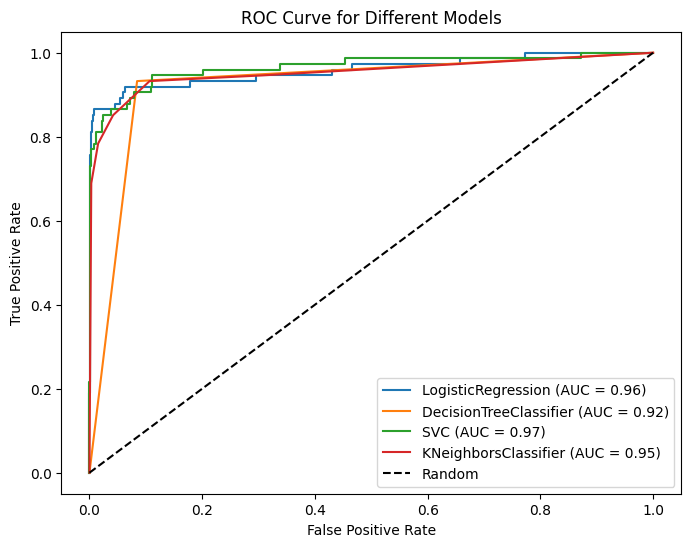

In [376]:
test_basic_models(X_train_resampled_preprocessed_no_outliers, X_test_preprocessed, y_train_resampled_no_outliers, y_test)

2. На датасете с андерсэмплингом и понижением размерности:

                         ROC AUC  Accuracy  Precision    Recall  F1-score
LogisticRegression      0.949356  0.925144   0.019975  0.878378  0.039062
DecisionTreeClassifier  0.847875  0.863536   0.010378  0.824324  0.020497
SVC                     0.952331  0.943636   0.026764  0.891892  0.051969
KNeighborsClassifier    0.953784  0.927531   0.020317  0.864865  0.039702


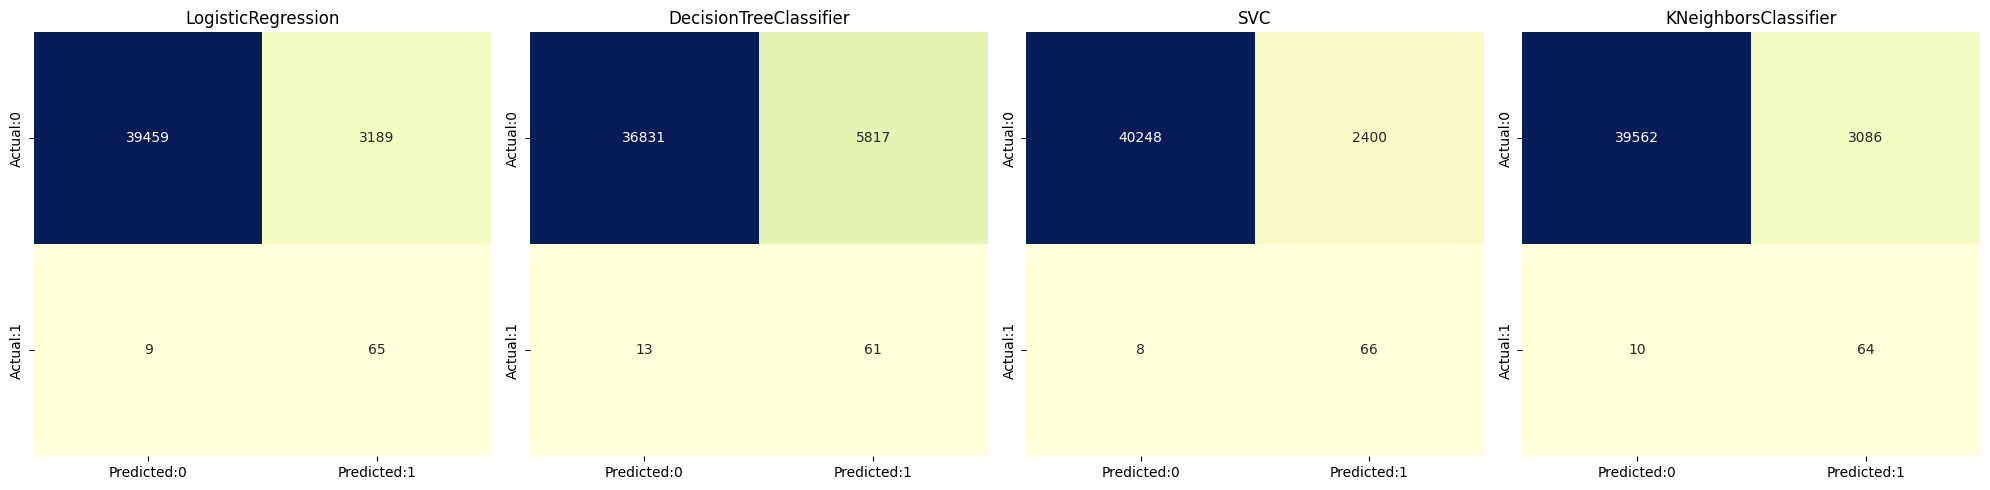

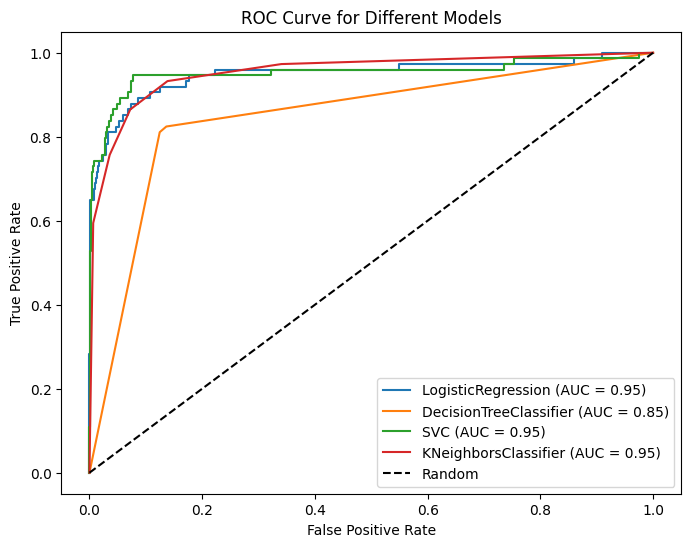

In [377]:
test_basic_models(X_train_resampled_preprocessed_no_outliers_PCA, X_test_preprocessed_PCA, y_train_resampled_no_outliers, y_test)

3. На датасете с оверсэмплингом:

/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                         ROC AUC  Accuracy  Precision    Recall  F1-score
LogisticRegression      0.965909  0.985113   0.092754  0.864865  0.167539
DecisionTreeClassifier  0.904233  0.997332   0.375000  0.810811  0.512821
SVC                     0.956194  0.995670   0.265823  0.851351  0.405145
KNeighborsClassifier    0.904493  0.996723   0.322581  0.810811  0.461538


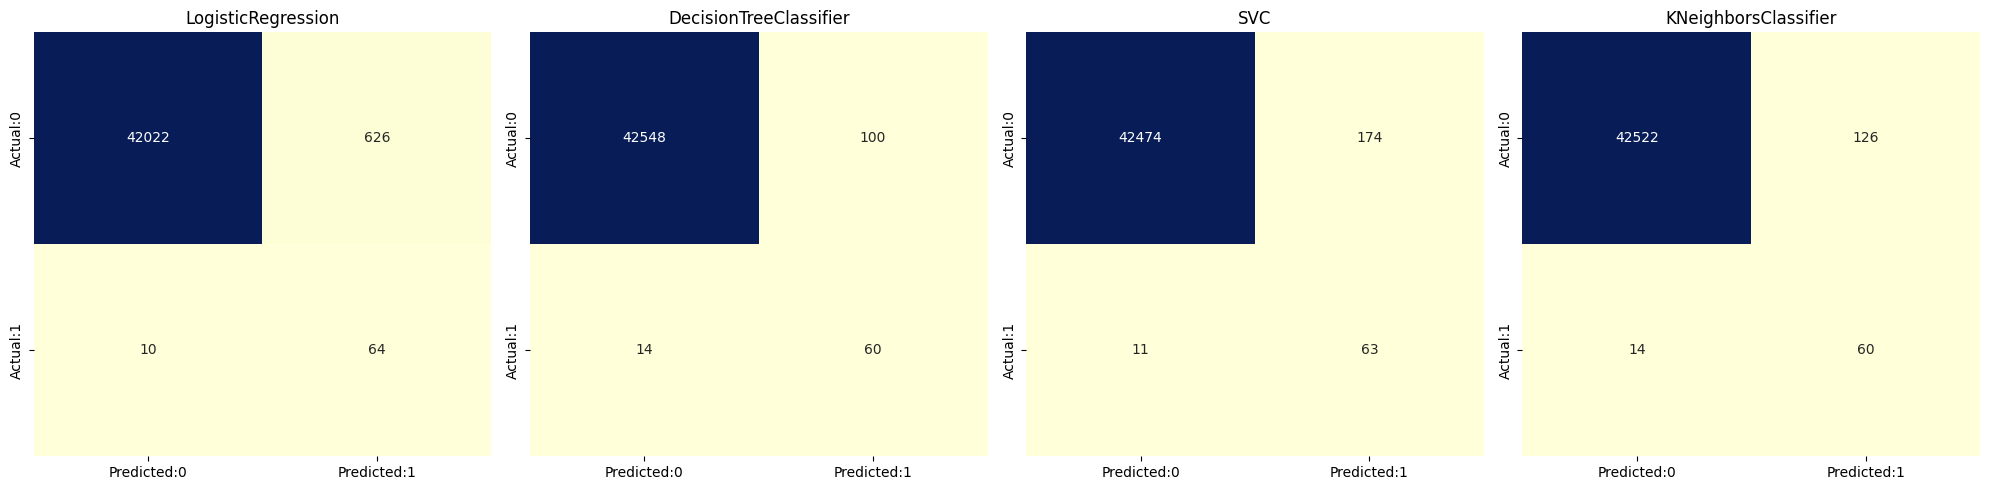

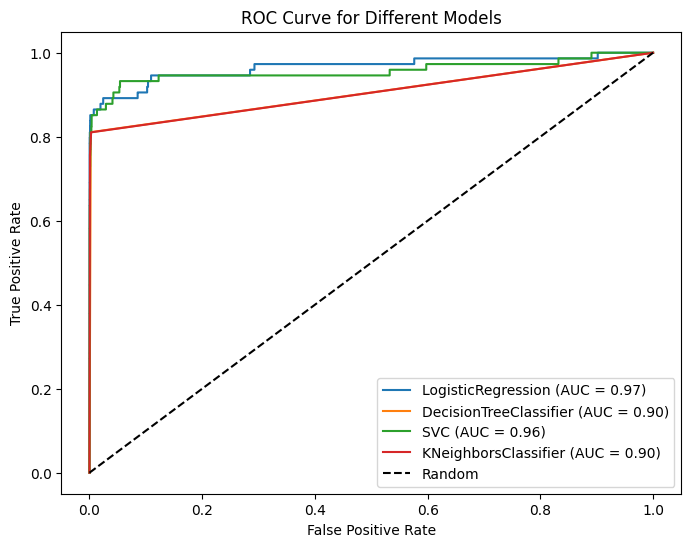

In [378]:
test_basic_models(X_train_smote_resampled_preprocessed_no_outliers, X_test_smote_preprocessed, y_train_smote_resampled_no_outliers, y_test)

4. На датасете с оверсэмплингом и понижением размерности:

                         ROC AUC  Accuracy  Precision    Recall  F1-score
LogisticRegression      0.956120  0.942980   0.026083  0.878378  0.050663
DecisionTreeClassifier  0.868024  0.990871   0.129108  0.743243  0.220000
SVC                     0.940913  0.970086   0.045317  0.810811  0.085837
KNeighborsClassifier    0.889135  0.991316   0.138686  0.770270  0.235052


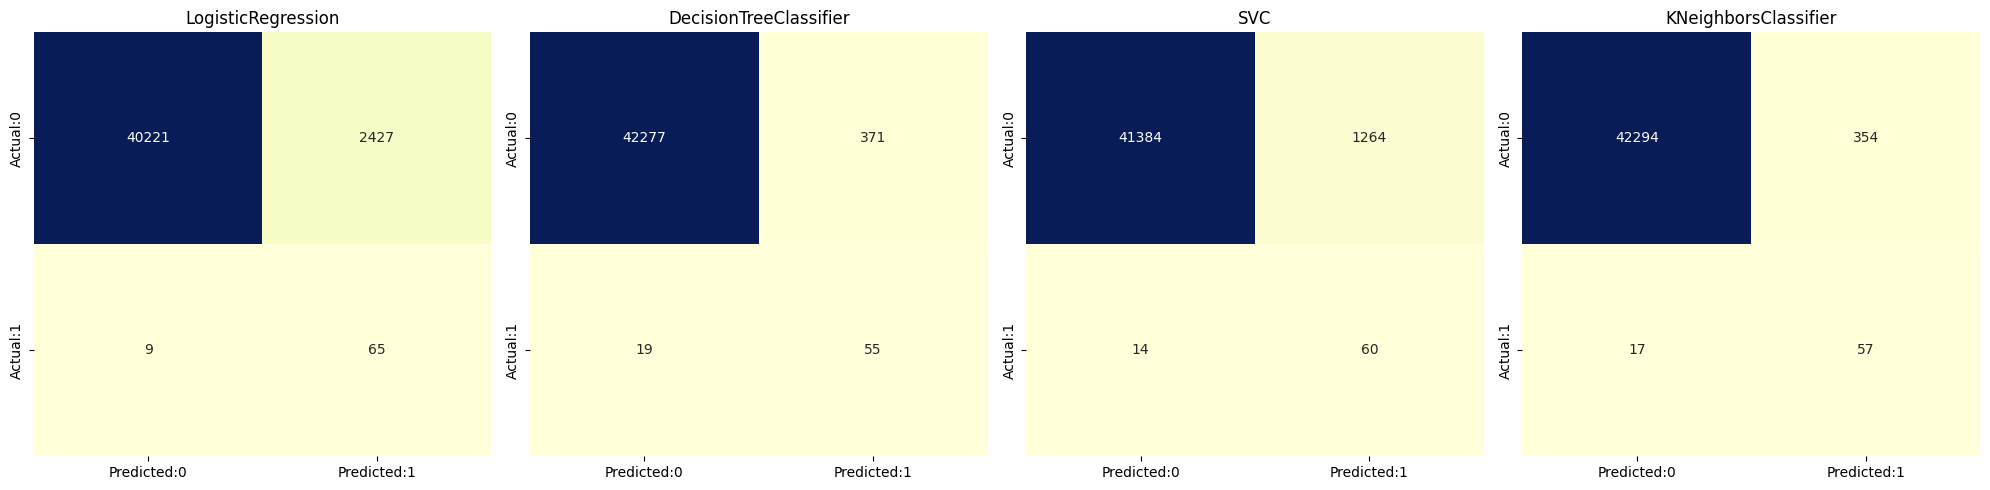

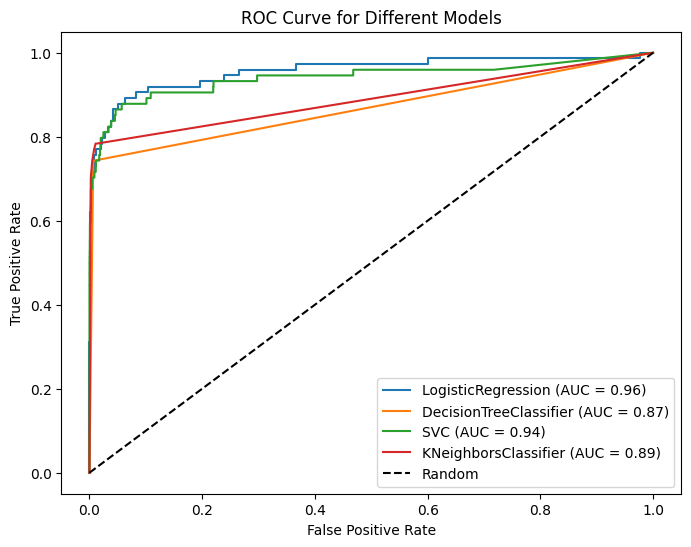

In [379]:
test_basic_models(X_train_smote_resampled_preprocessed_no_outliers_PCA, X_test_smote_preprocessed_PCA, y_train_smote_resampled_no_outliers, y_test)

Попробуем найти наилучшие вариант каждой модели методом кросс валидации:

In [62]:
lr_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]
}

locally_best_lr = GridSearchCV(
    LogisticRegression(random_state=random_state), 
    lr_params,
    verbose=True, 
    n_jobs=-1, 
    cv=5,
    scoring='recall')

locally_best_lr.fit(X_train_resampled_preprocessed_no_outliers, y_train_resampled_no_outliers)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=True)

In [172]:
tree_params = {
    'max_depth': range(2, 10),
    'min_samples_leaf': range(10, 13)
}

locally_best_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=random_state), 
    tree_params,
    verbose=True, 
    n_jobs=-1, 
    cv=5,
    scoring='recall')

locally_best_tree.fit(X_train_resampled_preprocessed_no_outliers, y_train_resampled_no_outliers)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(10, 13)},
             scoring='recall', verbose=True)

In [173]:
knn_params = {
    'n_neighbors': [5, 10, 15, 20]
}

locally_best_knn = GridSearchCV(
    KNeighborsClassifier(n_jobs=-1), 
    knn_params,
    verbose=True, 
    n_jobs=-1, 
    cv=5,
    scoring='recall')

locally_best_knn.fit(X_train_resampled_preprocessed_no_outliers, y_train_resampled_no_outliers)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 15, 20]}, scoring='recall',
             verbose=True)

In [63]:
svc_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
    'degree': range(2, 5)
}

locally_best_svc = GridSearchCV(
    SVC(random_state=random_state, probability=True), 
    svc_params,
    verbose=True, 
    n_jobs=-1, 
    cv=5,
    scoring='recall')

locally_best_svc.fit(X_train_resampled_preprocessed_no_outliers, y_train_resampled_no_outliers)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000],
                         'degree': range(2, 5),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='recall', verbose=True)

Сравним результаты для них:

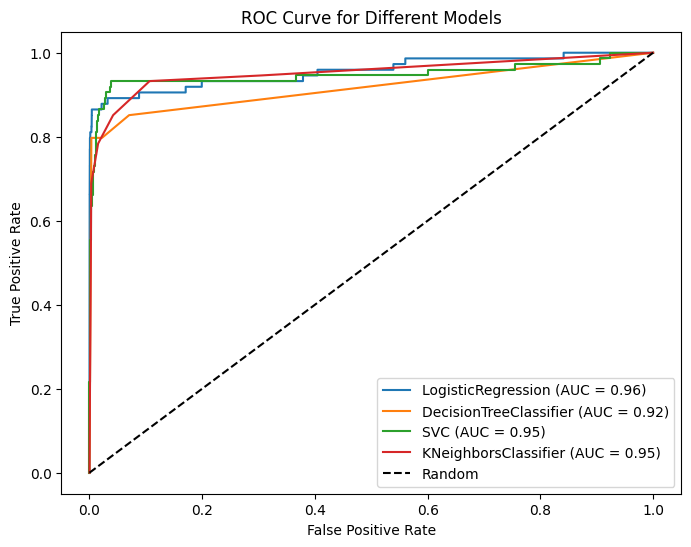

In [67]:
best_models = [locally_best_lr.best_estimator_, locally_best_tree.best_estimator_, locally_best_svc.best_estimator_, locally_best_knn.best_estimator_]


plot_roc_curves(best_models, X_test_preprocessed, y_test, (8, 6))

LogisticRegression показывает лучший результат.

In [68]:
locally_best_lr.best_estimator_

LogisticRegression(C=100, random_state=42)

In [69]:
print_basic_quality_metrics(y_test, locally_best_lr.predict(X_test_preprocessed), locally_best_lr.predict_proba(X_test_preprocessed))

ROC AUC:   0.956
Accuracy:  0.965
Precision: 0.042
Recall:    0.892
F1-score:  0.080


<module 'matplotlib.pyplot' from '/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

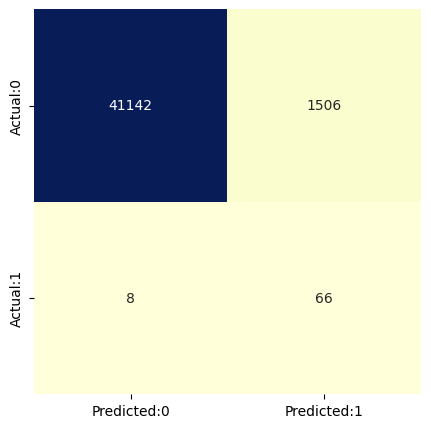

In [70]:
plot_confusion_matrix(y_test, locally_best_lr.predict(X_test_preprocessed))

После того, как мы выявили лучшие параметры каждой модели, посмотрим на кривые обучения для этих моделей:

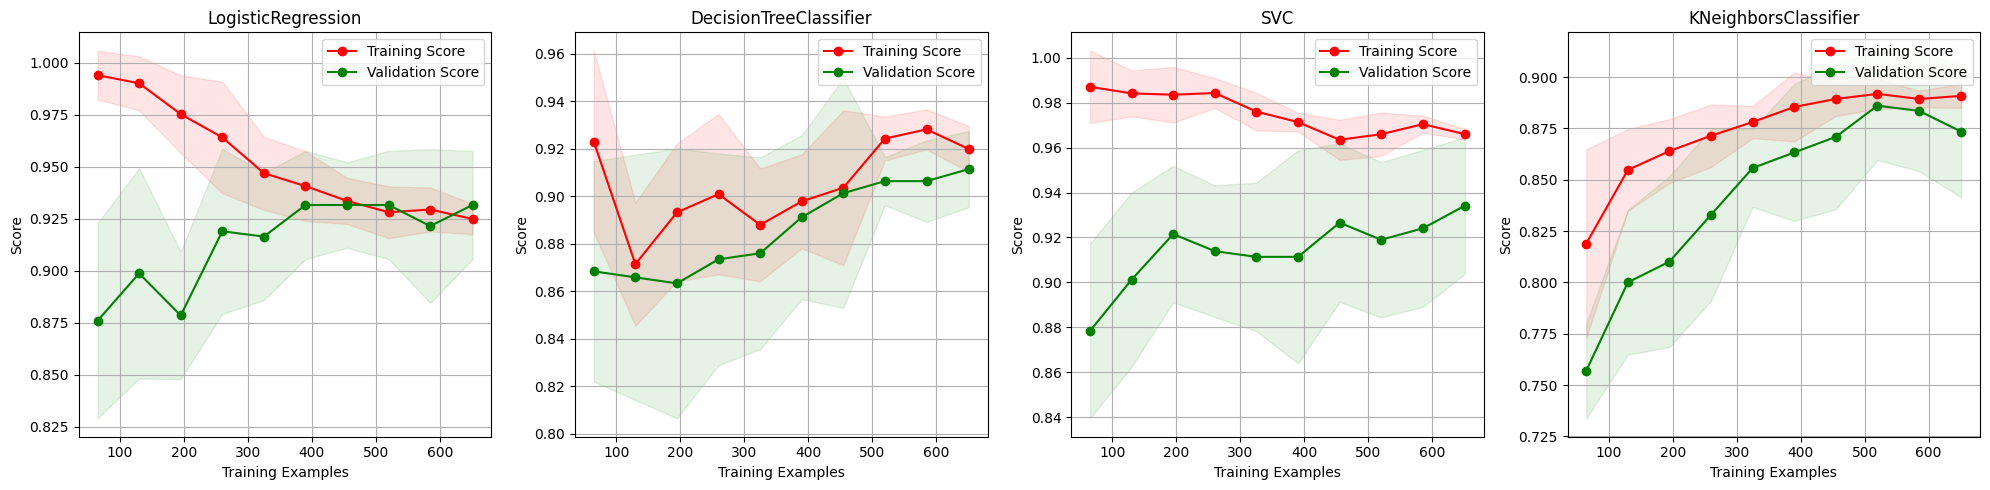

In [71]:
models = [locally_best_lr.best_estimator_, locally_best_tree.best_estimator_, locally_best_svc.best_estimator_, locally_best_knn.best_estimator_]


num_rows = 1
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5))

for i, model in enumerate(models):
    pipeline = ImbalancedPipeline([
        ('undersampling', RandomUnderSampler()),
        ('model', model)
    ])
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=random_state)

    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train_resampled_preprocessed_no_outliers, y_train_resampled_no_outliers, cv=cv, scoring='recall', train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax = axes[i]
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    ax.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    ax.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Score')
    ax.set_title(model.__class__.__name__)
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.legend()

plt.tight_layout()
plt.show()

Видим, что в лог регрессии и SVC скоры для тренировочного и валидационного сетов постепенно сходятся. Что говорит о том, что модели неплохо справляются с задачей классификации и увеличение объёмов данных будет приводить к росту качества модели.

                         ROC AUC  Accuracy  Precision    Recall  F1-score
LogisticRegression      0.955849  0.964562   0.041985  0.891892  0.080194
DecisionTreeClassifier  0.916599  0.929521   0.020568  0.851351  0.040166
SVC                     0.947293  0.942208   0.027240  0.932432  0.052934
KNeighborsClassifier    0.951975  0.957844   0.033999  0.851351  0.065387


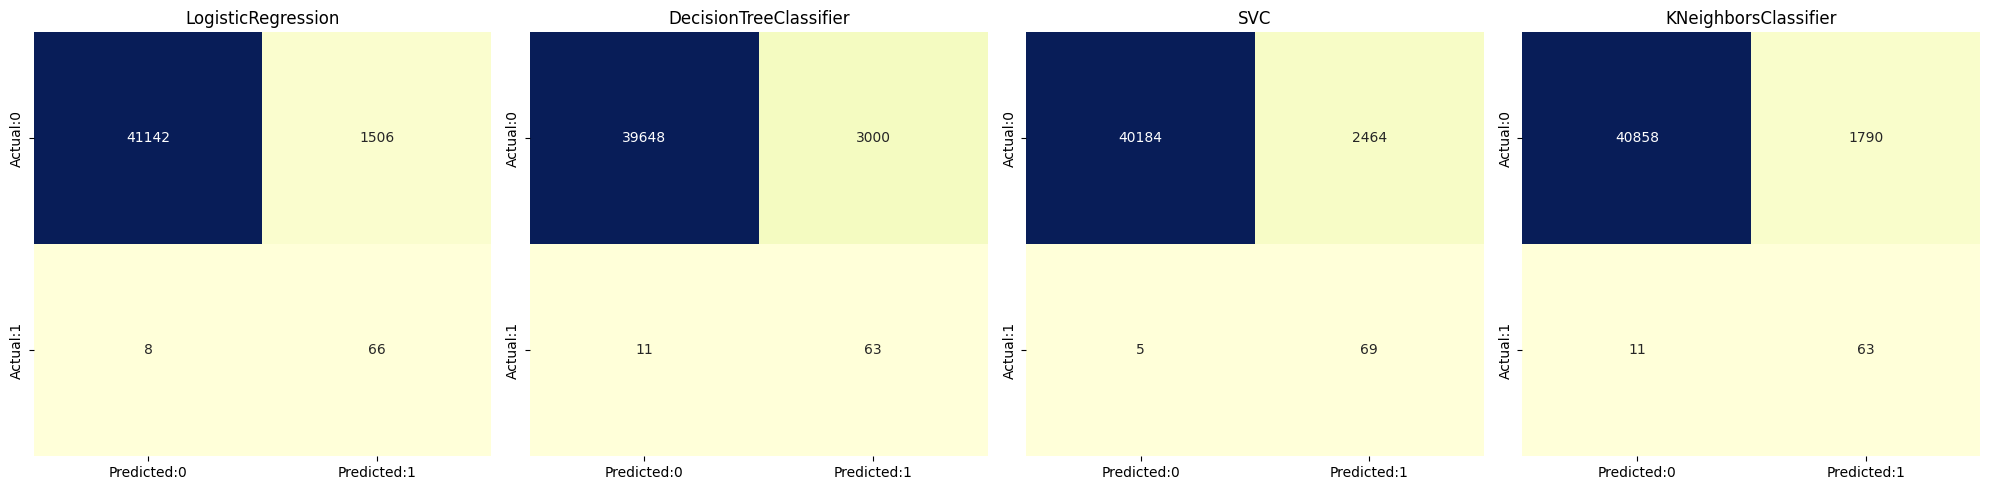

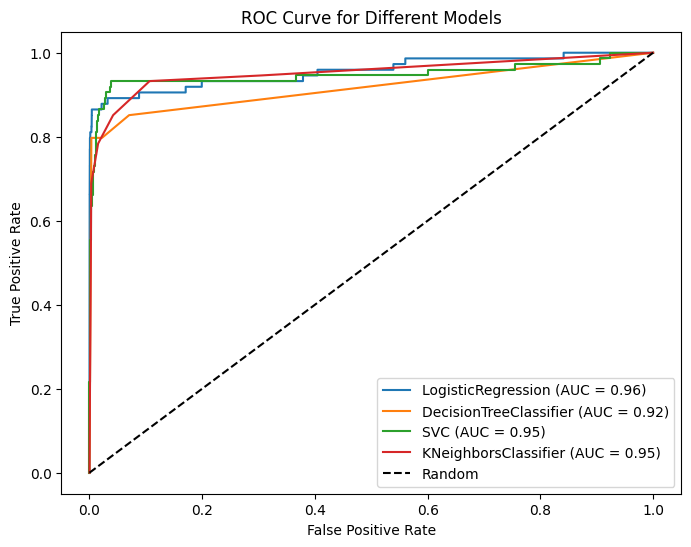

In [72]:
print_models_stats([locally_best_lr.best_estimator_, locally_best_tree.best_estimator_, locally_best_svc.best_estimator_, locally_best_knn.best_estimator_], X_test_preprocessed, y_test)

Видим и тут, что SVC и лог регрессия справляются неплохо. У SVC лучший показатель пропуска фродов (класс определяется наиболее полно). У лог регрессии наилучшая способность разделения классов в данном случае и соответственно лучший показатель f1-score.

Попробуем натренировать лог регрессию и SVC методом кросс валидации с применением RandomUnderSampler:

In [205]:
log_reg_model_undersample = copy.deepcopy(locally_best_lr.best_estimator_)

In [206]:
svc_model_undersample = copy.deepcopy(locally_best_svc.best_estimator_)

In [207]:
def random_undersample_cross_validation_train(model):
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

    for train, test in cv.split(X_train_preprocessed, y_train):

        rm = RandomUnderSampler()
        
        x, y = rm.fit_resample(
            ndarray_to_dataframe(X_train_preprocessed.iloc[train].values, columns=X_train_preprocessed.columns), 
            ndarray_to_dataframe(y_train.iloc[train].values, columns=['Class']))

        random_smote_indices = np.random.permutation(len(x))

        x = x.iloc[random_smote_indices]
        y = y.iloc[random_smote_indices]

        x.reset_index(drop=True, inplace=True)
        y.reset_index(drop=True, inplace=True)
        
        #x, y = iqr_remove_outliers(x, y, 5)

        model.fit(x, y)

In [208]:
random_undersample_cross_validation_train(log_reg_model_undersample)

In [209]:
random_undersample_cross_validation_train(svc_model_undersample)

                     ROC AUC  Accuracy  Precision    Recall  F1-score
LogisticRegression  0.799577  0.709868   0.004664  0.783784  0.009272
SVC                 0.944836  0.997519   0.289474  0.297297  0.293333


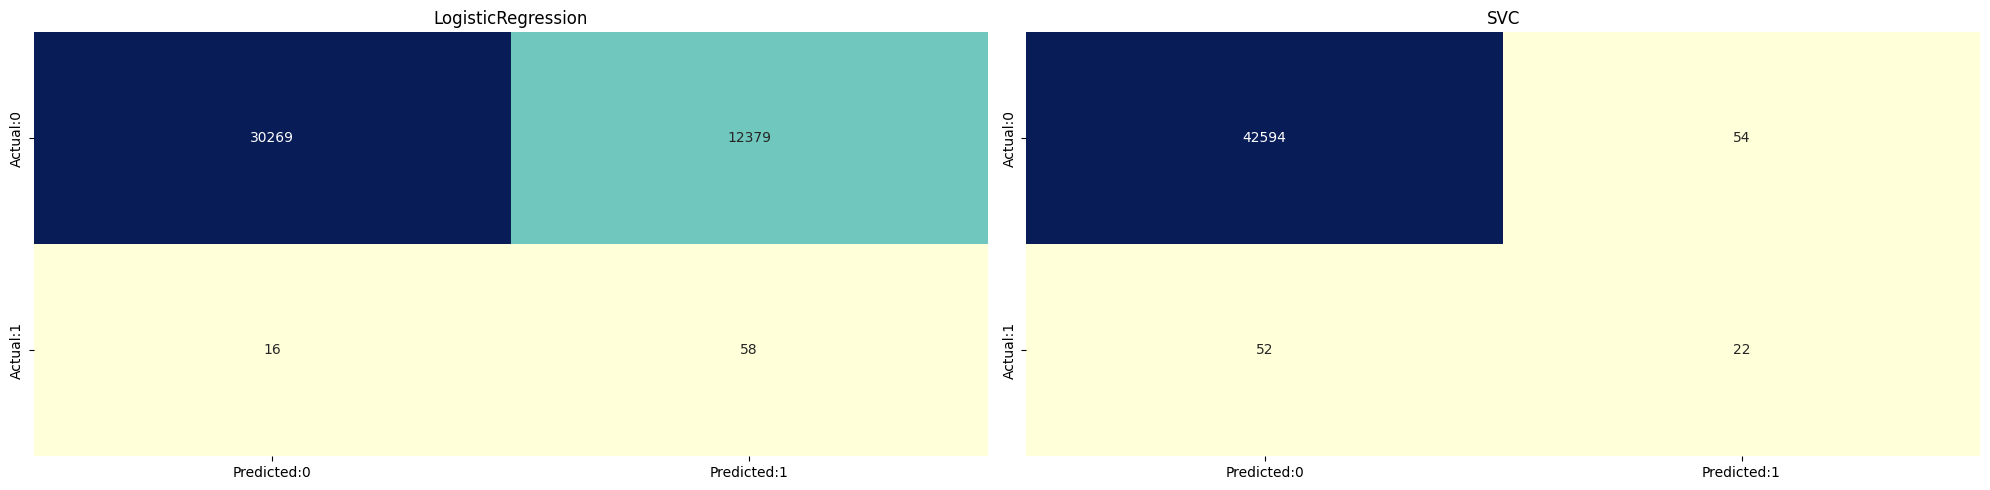

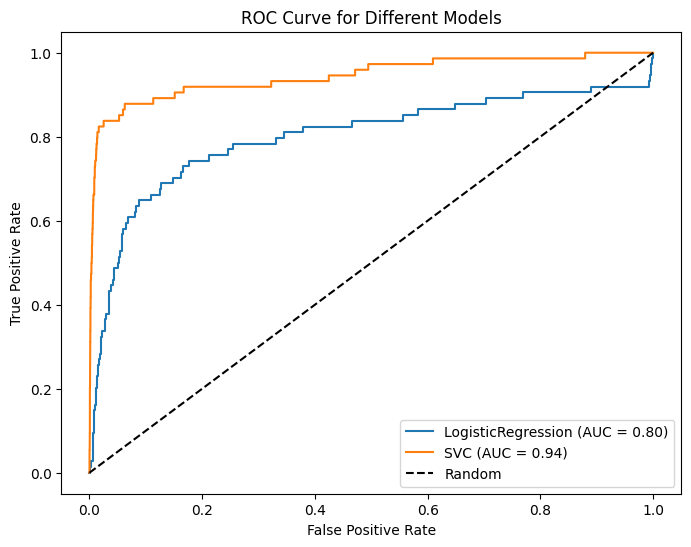

In [210]:
print_models_stats([log_reg_model_undersample, svc_model_undersample], X_test_preprocessed, y_test)

Попробуем натренировать лог регрессию и SVC методом кросс валидации с применением SMOTE:

In [245]:
log_reg_model_smote = copy.deepcopy(locally_best_lr.best_estimator_)

In [246]:
svc_model_smote = copy.deepcopy(locally_best_svc.best_estimator_)

In [251]:
def smote_cross_validation_train(model):
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

    for train, test in cv.split(X_train_preprocessed, y_train):

        sm = SMOTE(sampling_strategy='minority')
        
        x, y = sm.fit_resample(
            ndarray_to_dataframe(X_train_preprocessed.iloc[train].values, columns=X_train_preprocessed.columns), 
            ndarray_to_dataframe(y_train.iloc[train].values, columns=['Class']))

        random_smote_indices = np.random.permutation(len(x))

        x = x.iloc[random_smote_indices]
        y = y.iloc[random_smote_indices]

        x.reset_index(drop=True, inplace=True)
        y.reset_index(drop=True, inplace=True)
        
        #x, y = iqr_remove_outliers(x, y, 5)

        model.fit(x[:50000], y[:50000])

In [252]:
smote_cross_validation_train(log_reg_model_smote)

In [253]:
smote_cross_validation_train(svc_model_smote)

                     ROC AUC  Accuracy  Precision    Recall  F1-score
LogisticRegression  0.929404  0.895862   0.013997  0.851351  0.027541
SVC                 0.849472  0.992744   0.126582  0.540541  0.205128


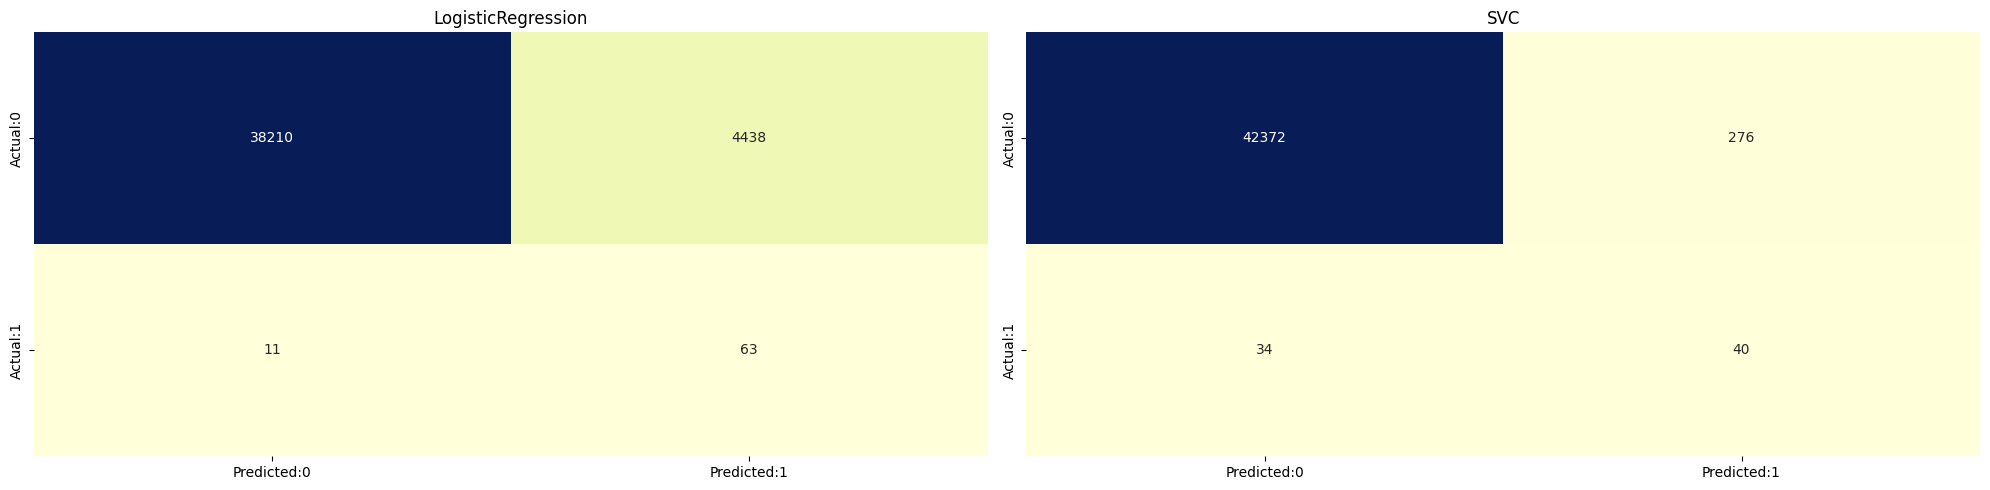

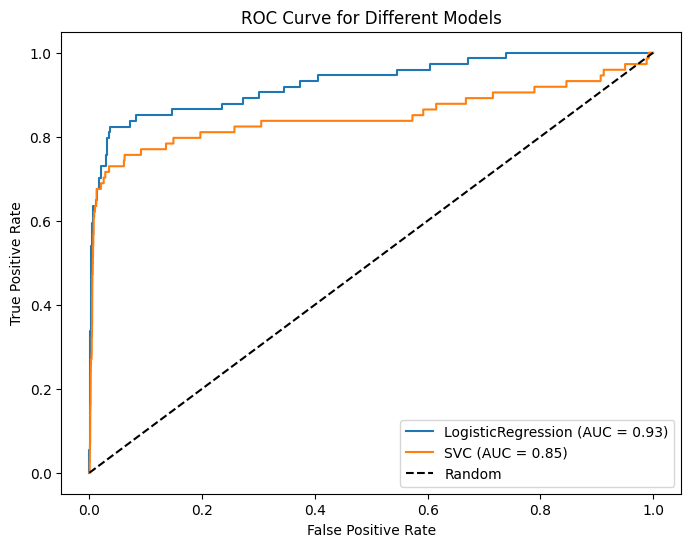

In [254]:
print_models_stats([log_reg_model_smote, svc_model_smote], X_test_preprocessed, y_test)

Searching for best lr estimator with cv and random undersampling:

In [321]:
rm_cv_pipeline = ImbalancedPipeline([
    ('smote', RandomUnderSampler()),
    ('model', LogisticRegression(max_iter=1000000, n_jobs=-1))
])

rm_cv_pipeline_params = {
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]
}

locally_best_lr_rm_cv = GridSearchCV(
    rm_cv_pipeline, 
    rm_cv_pipeline_params,
    verbose=True,
    n_jobs=-1,
    cv=5,
    scoring='recall')

locally_best_lr_rm_cv.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', RandomUnderSampler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000000,
                                                           n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000,
                                      10000],
                         'model__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=True)

           ROC AUC  Accuracy  Precision    Recall  F1-score
Pipeline  0.885772  0.994453   0.113744  0.324324  0.168421


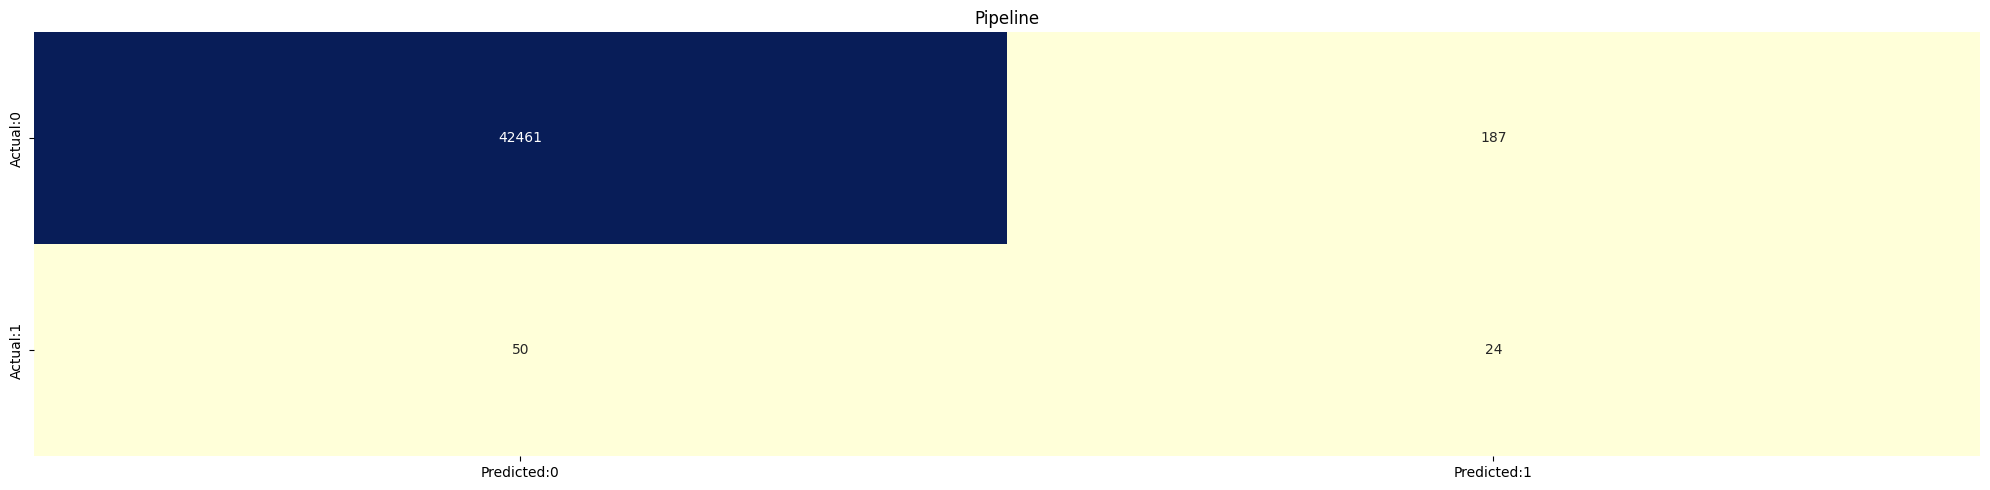

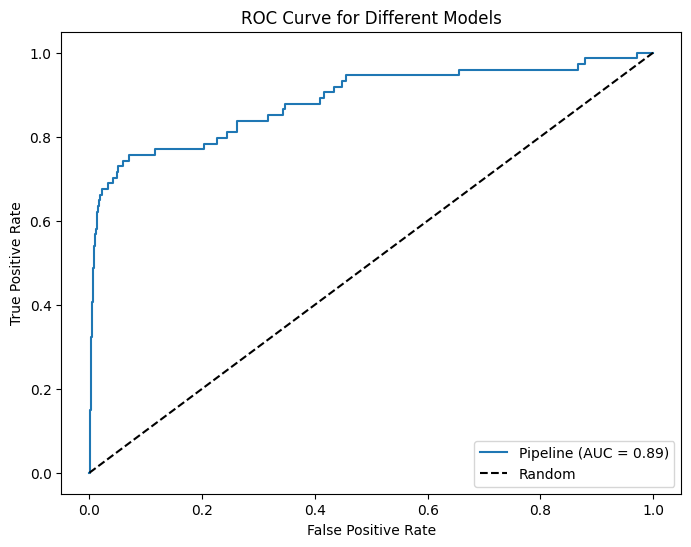

In [322]:
print_models_stats([locally_best_lr_rm_cv.best_estimator_], X_test_preprocessed, y_test)

Searching for best lr estimator with cv and SMOTE:

In [313]:
sm_cv_pipeline = ImbalancedPipeline([
    ('smote', SMOTE()),
    ('model', LogisticRegression(n_jobs=-1))
])

sm_cv_pipeline_params = {
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]
}

locally_best_lr_sm_cv = GridSearchCV(
    sm_cv_pipeline, 
    sm_cv_pipeline_params,
    verbose=True, 
    n_jobs=-1, 
    cv=5,
    scoring='recall')

locally_best_lr_sm_cv.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alex/projects/ml/ml_hw/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('model',
                                        LogisticRegression(n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000,
                                      10000],
                         'model__penalty': ['l1', 'l2', 'elasticnet']},
             scoring='recall', verbose=True)

           ROC AUC  Accuracy  Precision    Recall  F1-score
Pipeline  0.927941  0.909157   0.016018  0.851351  0.031445


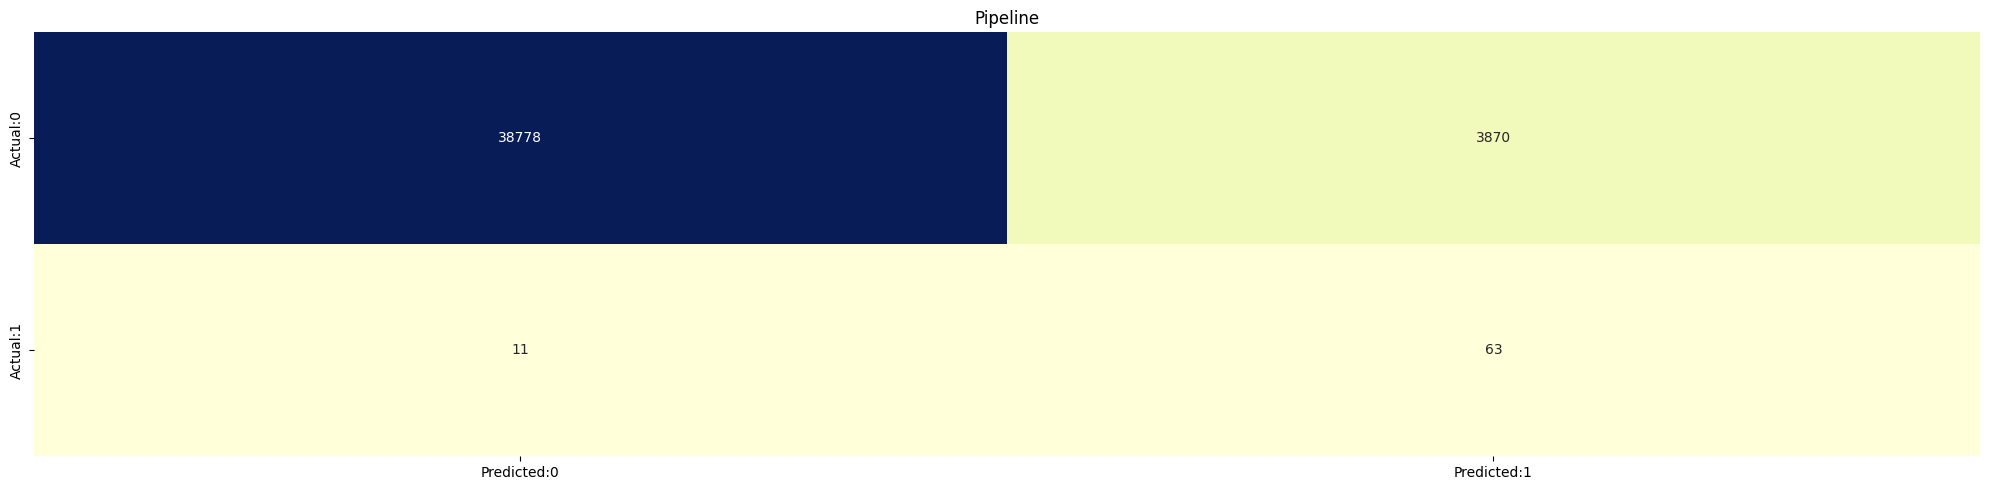

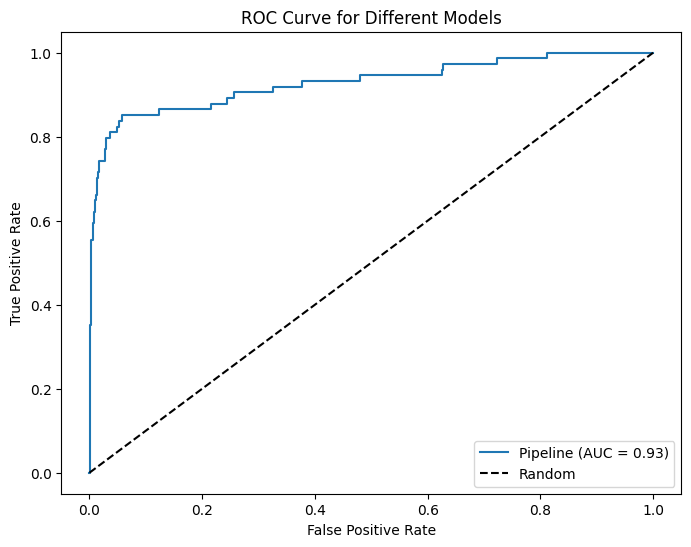

In [314]:
print_models_stats([locally_best_lr_sm_cv.best_estimator_], X_test_preprocessed, y_test)

<a id="1"></a>
# <p style="padding:10px;background-color:#9619EC;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Summary</p>

Был проведён анализ датасета, в ходе которого были выявлены следующие моменты:<br>
- присутствует сильный дисбаланс классов. положительный класс очень слабо представлен<br>
- присутствует бимодальное распределение признака Time<br>

Для нормализации бимодального распределения было применено логарифмическое преобразование.

Для решения проблемы использовались два подхода: 
- оверсэмплинг методом SMOTE
- андерсэмплинг методом RandomUnderSampler

Были проанализированы 4 метода классификации:
- LogisticRegression
- SVC
- KNN
- DecisionTree

Все базовые модели были обучены на датасетах, как на датасетах с андерсэмплингом, так и оверсэмплингом.<br>
Так же для каждой из моделей методом кросс валидации на сэмплированных данных были выявлены лучшие гиперпараметры.<br><br>

Результаты оценки лучших вариантов моделей получились следующие (recall):<br>
- LogisticRegression - 0.891892
- DecisionTreeClassifier - 0.851351
- SVC - 0.932432
- KNeighborsClassifier - 0.851351


Сравнив лучшие варианты для каждой из моделей и сравнив кривые их обучения, были сделаны выводы, что лучше всего в данном случае с задачей классификации справляются логистическая регрессия и метод опорных векторов, поэтому было принятно решение более детально поработать с этими моделями.

Ранее кросс валидация проводилась на сэмплированном датасете, что не является корректным, т.к. более верным подоходом будет проводить сэмплирование во время кросс валидации.

Для логистической регрессии и метода опорных векторов была проведена кросс валидация с сэмлированием на каждой итерации.

В нашем случае результаты показали, что логистическая регрессия лучше справляется с задачей классификации.

Финальные значения метрик на основе логистической регрессии:<br>
- ROC AUC:   0.927941  
- Accuracy:  0.909157   
- Precision: 0.016018  
- Recall:      0.851351  
- F1-score:  0.031445

В качестве финальных значений метрик взяты значения, полученные на лучшей модели логистической регрессии, найденной методом кросс-валидации с применением SMOTE.

Таким образом, можем сделать следующие выводы:
- в случае ярко выраженного дисбаланса классов необходимо применять один из методов сэмплирования (оверсэмплинг или андерсэмплинг).
- оверсэмплинг более предпочтителен, т.к. модели будет сложнее подстроиться конкретно под конкретный набор данных в силу их большого количества, т.е. не допустить переобучения
- при проведении кросс валидации необходимо проводить метод сэмплирования непосредственно во время кросс валидации